# <font color="red"><p align="center">📌 Inferential Statistical Analysis</p></font>
<p align="center">Hypothesis 1</p1>

Research Objective: “Is repeated shutdown able to control a movement against the government and its impact on individuals' mental health and government stability & national issues?”

#### ✅ Step 1: Import All Necessary Libraries

In [1]:
import pandas as pd         
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns  
import math    
from scipy.stats import chi2_contingency  
from wordcloud import WordCloud  
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from itertools import combinations

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy.stats import kruskal

import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel

#### ✅ Step 2: Load The Dataset & Basic Analysis 

2.1: Load the dataset

In [2]:
file_path = "Final Dataset.xlsx"
df = pd.read_excel(file_path)

2.2: Info of the dataset

In [3]:
# df.info()

2.3: Head of the dataset

In [4]:
pd.set_option('display.max_columns', None)  # for showing all columns
pd.set_option('display.expand_frame_repr', False)  # this prevent wrapping to new lines
print(df.head())

  Age_Range  Gender Occupation    Hometown Aware_Shutdown Internet_Usage_BS Internet_Reliance_BS IS_Affect_Daily_Routine Change_Digital_Dependency Reconsider_Offline_Alternatives Justify_Shutdown_in_Certain_Situation S_Limit_Freedom_of_Speech Shutdown_Effectiveness_in_GIP Future_Acceptance_of_S_for_NS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO     ISLAC_Protest_CM Primary_Communication_Mode_BS Comm_Disruption_due_to_S Social_Media_Usage_Change_AS Switch_Alt_Comm_Methods_DS News_Reliance_on_Internet_BS Mental_Impact_of_S                               Coping_Strategy_DS     Lasting_Impact_on_MH        CORS_on_National_Stability          Democracy_Perception_if_SDOA ISR_in_GPC_in_Bang
0     18-29  Female    Student  Chattogram            Yes         2-4 hours             A little                      No                 No change                              No                               Neutral                Not at all                       Neutral                       Neutr

2.4: Check for missing values in the dataset

In [5]:
missing_values = df.isnull().sum()
missing_values[missing_values> 0] # Display missing values only if they exist

Series([], dtype: int64)

2.5: Check for duplicate values in the dataset

In [6]:
has_duplicates = df.duplicated().any()
print(f"Are there any duplicate rows? {has_duplicates}")

Are there any duplicate rows? True


In [7]:
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")
duplicate_rows = df[df.duplicated()]
# print(duplicate_rows)

Number of duplicate rows: 23


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(1267, 28)

In [10]:
# df.to_excel("df_cleaned.xlsx", index=False)

#### ✅ Step 3: Hypothesis (1) Testing

In [11]:
"""
  Effectiveness of Internet Shutdowns in Controlling Movements
    H₀ (Null Hypothesis): Internet shutdowns do not significantly reduce participation in civic movements or protests.
    H₁ (Alternative Hypothesis): Internet shutdowns significantly reduce participation in civic movements or protests.
    
    🔹 Variables:
        • Independent Variable: Aware_Shutdown
                                Internet_Reliance_BS 
                                Internet_Usage_BS 
                                IS_Affect_Daily_Routine
        • Dependent Variable:   Protest_Hindrance_AG
                                Future_Civic_Engagement_if_ASO
                                ISLAC_Protest_CM
"""

'\n  Effectiveness of Internet Shutdowns in Controlling Movements\n    H₀ (Null Hypothesis): Internet shutdowns do not significantly reduce participation in civic movements or protests.\n    H₁ (Alternative Hypothesis): Internet shutdowns significantly reduce participation in civic movements or protests.\n    \n    🔹 Variables:\n        • Independent Variable: Aware_Shutdown\n                                Internet_Reliance_BS \n                                Internet_Usage_BS \n                                IS_Affect_Daily_Routine\n        • Dependent Variable:   Protest_Hindrance_AG\n                                Future_Civic_Engagement_if_ASO\n                                ISLAC_Protest_CM\n'

In [12]:
df.shape

(1267, 28)

In [13]:
df_hy1 = df.copy()

In [14]:
# df_hy1.to_excel("df_hy1.xlsx", index=False)

3.1: Association Testing: Chi-Square Test & Bonferroni Correction

###### 3.1.1: Data Assumption Check (Verify Expected Frequencies (≥5) for Chi-square Test)

In [15]:
# Define dependent and independent variables
dependent_vars = [
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO',
    'ISLAC_Protest_CM'
]

independent_vars = [
    'Aware_Shutdown',
    'Internet_Reliance_BS',
    'Internet_Usage_BS',
    'IS_Affect_Daily_Routine'
]

# Function to check expected frequencies
def check_expected_frequencies(df, dep_var, indep_var):
    contingency_table = pd.crosstab(df[dep_var], df[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    expected_df = pd.DataFrame(expected,
                               index=contingency_table.index,
                               columns=contingency_table.columns)
    below_5 = (expected_df < 5).sum().sum()
    print(f"\n✅ Checking Pair: {dep_var} ↔ {indep_var}")
    print("============================================================")
    print("Contingency Table:\n", contingency_table)
    print("\nExpected Frequencies:\n", expected_df.round(2))
    if below_5 > 0:
        print(f"\n⚠️ Warning: {below_5} cells have expected frequencies below 5. Consider merging categories.\n")
    else:
        print("✅ All expected frequencies ≥ 5. Good to proceed.\n")

# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy1, dep, indep)


✅ Checking Pair: Protest_Hindrance_AG ↔ Aware_Shutdown
Contingency Table:
 Aware_Shutdown        No  Yes
Protest_Hindrance_AG         
A little              35  310
Completely            54  379
Moderately            41  281
Not at all            16  151

Expected Frequencies:
 Aware_Shutdown           No     Yes
Protest_Hindrance_AG               
A little              39.76  305.24
Completely            49.90  383.10
Moderately            37.10  284.90
Not at all            19.24  147.76
✅ All expected frequencies ≥ 5. Good to proceed.


✅ Checking Pair: Protest_Hindrance_AG ↔ Internet_Reliance_BS
Contingency Table:
 Internet_Reliance_BS  A little  Extremely  Moderately  Not at all
Protest_Hindrance_AG                                             
A little                   129         50         142          24
Completely                  61        115         244          13
Moderately                  41         82         193           6
Not at all                  50         30 

In [16]:
"""
for one pair (Future_Civic_Engagement_if_ASO ↔ Internet_Reliance_BS), 
there is a warning: ⚠️ Warning: 2 cells have expected frequencies below 5. Consider merging categories.
So now we will merge categories, feature Internet_Reliance_BS has 4 distinct values, but now we will
merge A little and Not at all as A little to fullfill chi-square test assumption.
"""

'\nfor one pair (Future_Civic_Engagement_if_ASO ↔ Internet_Reliance_BS), \nthere is a warning: ⚠️ Warning: 2 cells have expected frequencies below 5. Consider merging categories.\nSo now we will merge categories, feature Internet_Reliance_BS has 4 distinct values, but now we will\nmerge A little and Not at all as A little to fullfill chi-square test assumption.\n'

In [17]:
# Merge "Not at all" category into "A little" for Internet_Reliance_BS in df_hy1
df_hy1['Internet_Reliance_BS'] = df_hy1['Internet_Reliance_BS'].replace({
    'Not at all': 'A little'
})

# Verify the merged categories
print("Updated Categories:\n", df_hy1['Internet_Reliance_BS'].value_counts())

Updated Categories:
 Internet_Reliance_BS
Moderately    656
A little      334
Extremely     277
Name: count, dtype: int64


In [18]:
# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy1, dep, indep)


✅ Checking Pair: Protest_Hindrance_AG ↔ Aware_Shutdown
Contingency Table:
 Aware_Shutdown        No  Yes
Protest_Hindrance_AG         
A little              35  310
Completely            54  379
Moderately            41  281
Not at all            16  151

Expected Frequencies:
 Aware_Shutdown           No     Yes
Protest_Hindrance_AG               
A little              39.76  305.24
Completely            49.90  383.10
Moderately            37.10  284.90
Not at all            19.24  147.76
✅ All expected frequencies ≥ 5. Good to proceed.


✅ Checking Pair: Protest_Hindrance_AG ↔ Internet_Reliance_BS
Contingency Table:
 Internet_Reliance_BS  A little  Extremely  Moderately
Protest_Hindrance_AG                                 
A little                   153         50         142
Completely                  74        115         244
Moderately                  47         82         193
Not at all                  60         30          77

Expected Frequencies:
 Internet_Reliance_BS  A 

###### 3.1.2: Perform Chi-square Test of Independence

In [19]:
results = []

for dep in dependent_vars:
    for indep in independent_vars:
        contingency_table = pd.crosstab(df_hy1[dep], df_hy1[indep])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Bias-corrected Cramér’s V calculation
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)
        cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        # Append results clearly
        results.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Chi-square Statistic': round(chi2, 4),
            'Degrees of Freedom': dof,
            'P-value': round(p, 4),
            'Effect Size (Bias-Corrected Cramér’s V)': round(cramers_v, 4),
            'Significance': 'Significant ✅' if p < 0.05 else 'Not Significant ❌'
        })

chi_square_results_df_corrected = pd.DataFrame(results)

print("\nChi-square Test Summary Table (Bias-Corrected Cramér’s V):")
print("===============================================================")
print(chi_square_results_df_corrected)


Chi-square Test Summary Table (Bias-Corrected Cramér’s V):
                Dependent Variable     Independent Variable  Chi-square Statistic  Degrees of Freedom  P-value  Effect Size (Bias-Corrected Cramér’s V)       Significance
0             Protest_Hindrance_AG           Aware_Shutdown                2.1046                   3   0.5510                                   0.0000  Not Significant ❌
1             Protest_Hindrance_AG     Internet_Reliance_BS              109.6156                   6   0.0000                                   0.2024      Significant ✅
2             Protest_Hindrance_AG        Internet_Usage_BS               64.9842                   9   0.0000                                   0.1215      Significant ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine               19.2724                   6   0.0037                                   0.0724      Significant ✅
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown                8.6586    

In [20]:
# chi_square_results_df_corrected.to_excel("output.xlsx", index=False)


###### 3.1.3: Interpret Results in Simple words

In [21]:
"""
📌 Summary of Key Findings:
1. Internet_Reliance_BS, Internet_Usage_BS, and disruptions to daily routine (IS_Affect_Daily_Routine)
   due to shutdown significantly reduce people's willingness and ability to engage in civic 
   activities and communicate about protests.
2. Merely being aware of the shutdown (Aware_Shutdown) has little or no effect on civic engagement 
   or communication.
"""

"\n📌 Summary of Key Findings:\n1. Internet_Reliance_BS, Internet_Usage_BS, and disruptions to daily routine (IS_Affect_Daily_Routine)\n   due to shutdown significantly reduce people's willingness and ability to engage in civic \n   activities and communicate about protests.\n2. Merely being aware of the shutdown (Aware_Shutdown) has little or no effect on civic engagement \n   or communication.\n"

###### 3.1.4: Visualization

###### 3.1.4.1: Clustered Column Chart (shows distributions clearly)

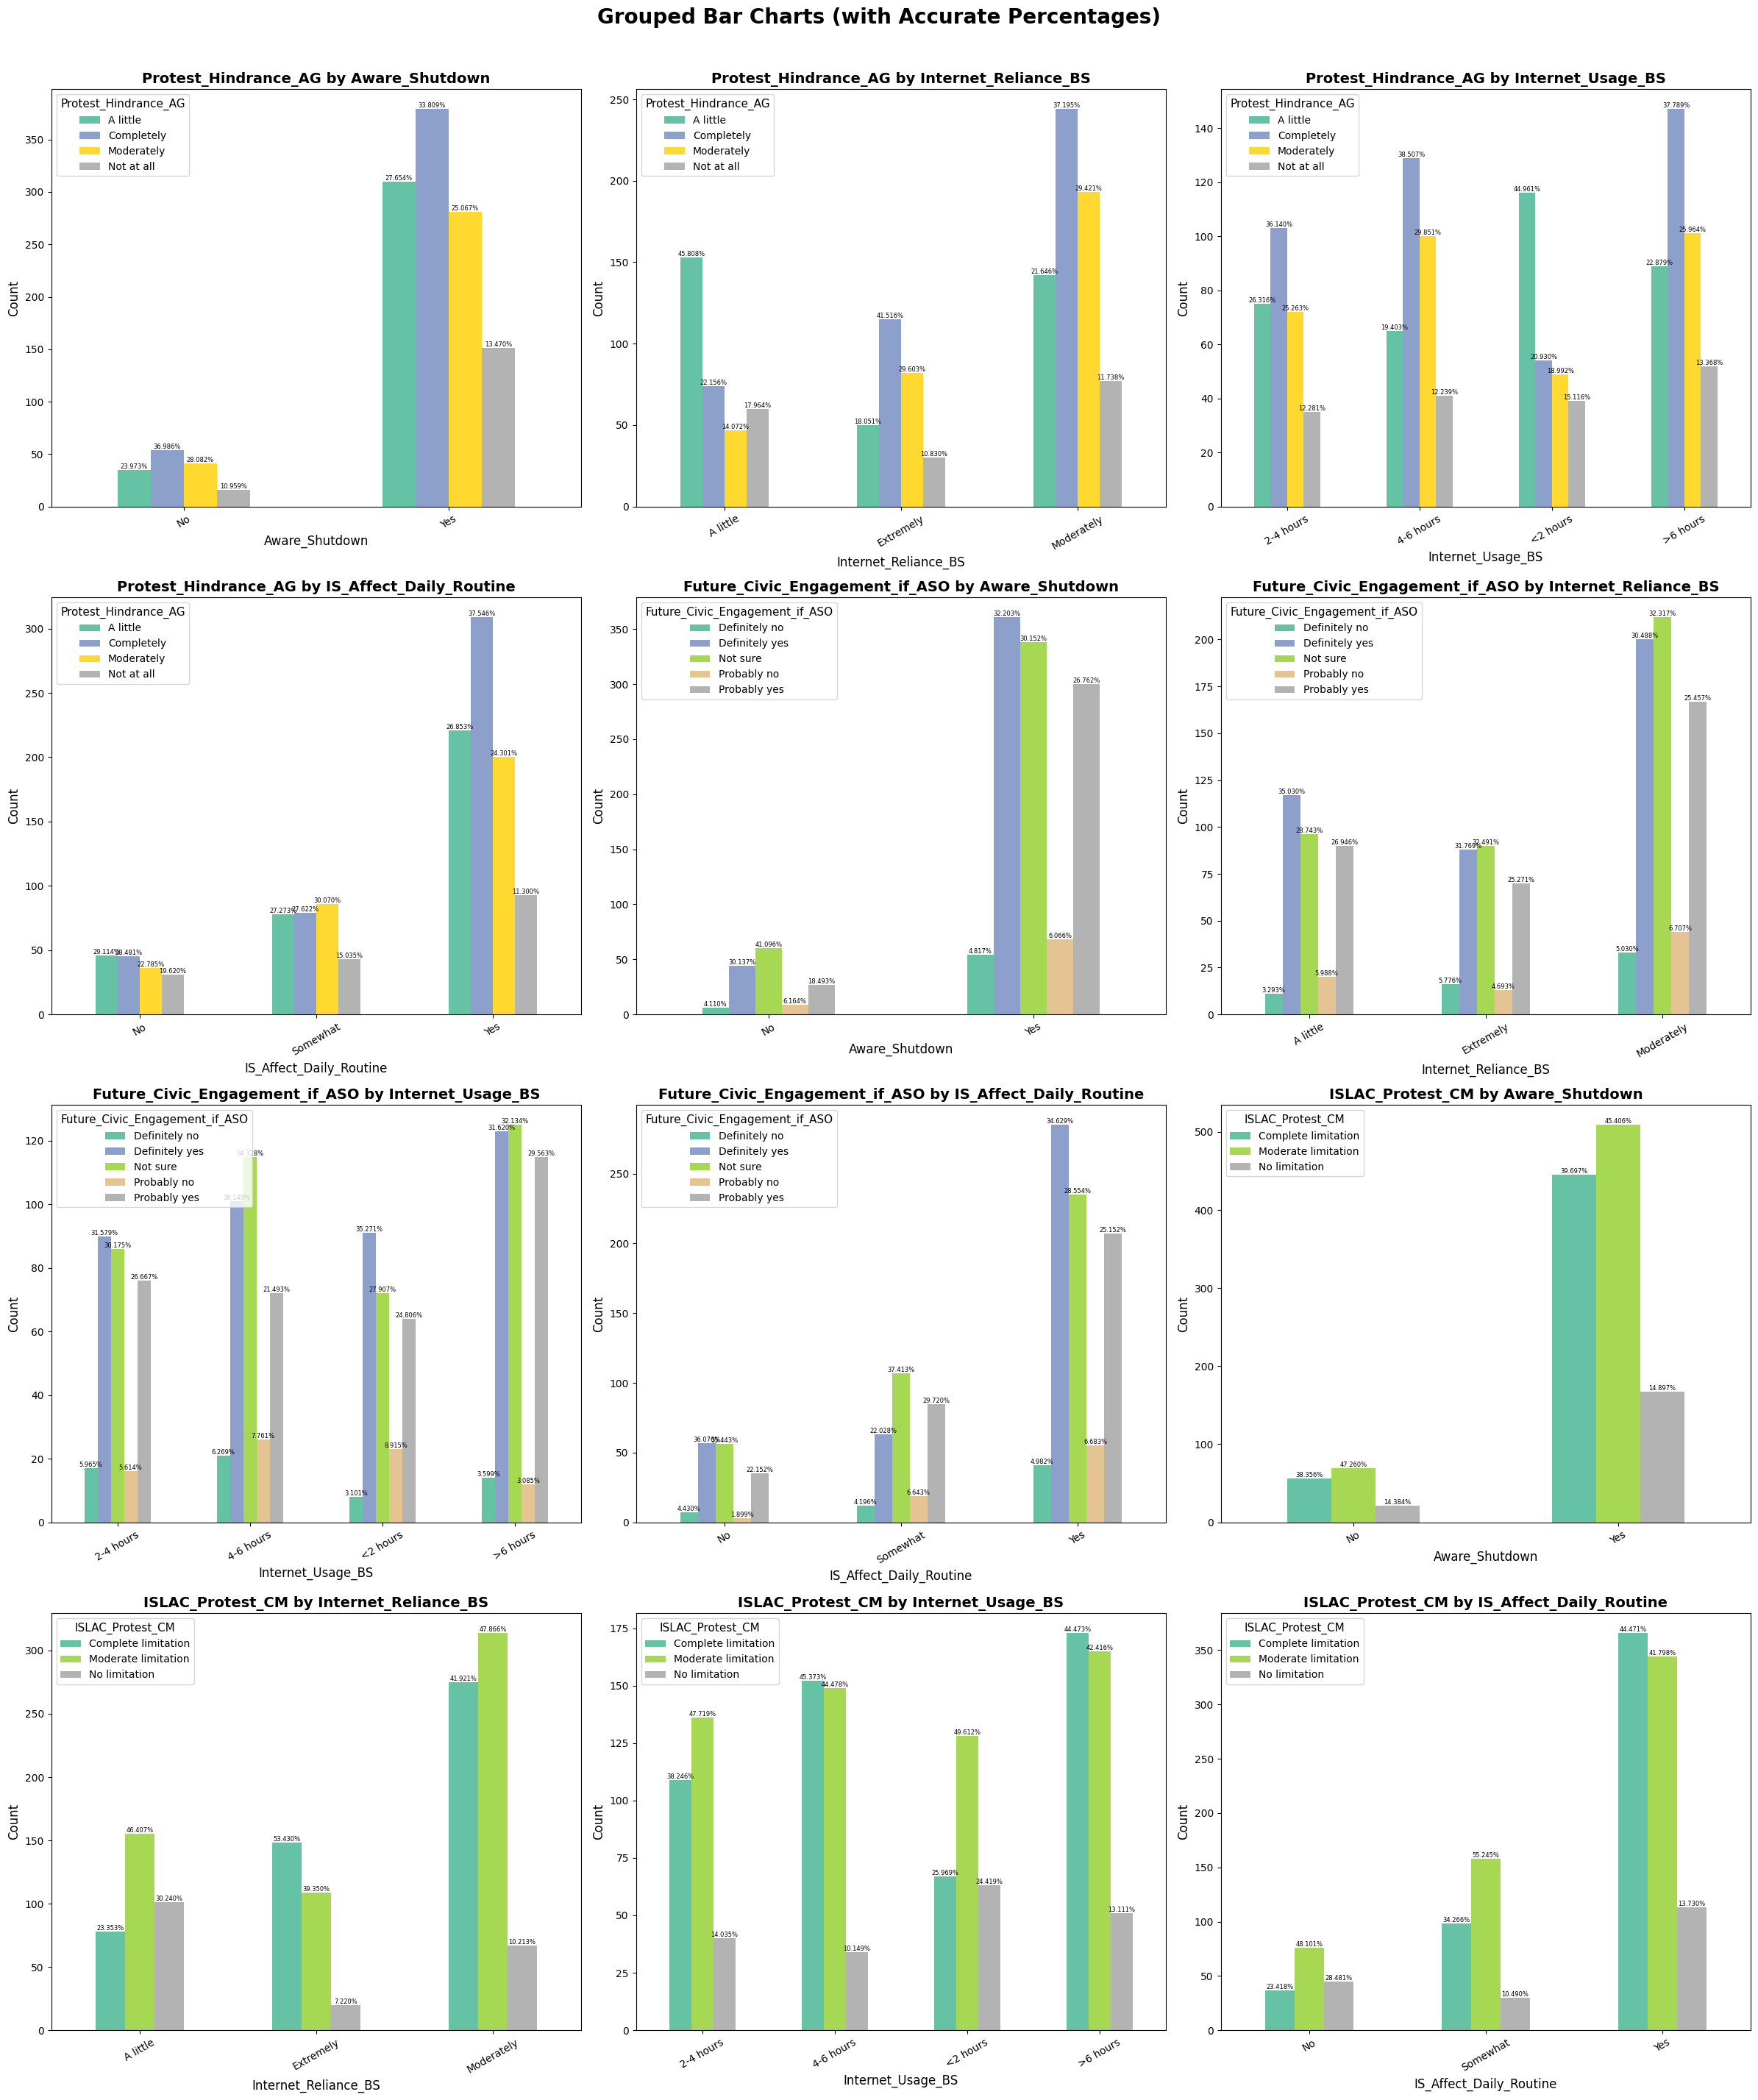

In [22]:
# Define all variable pairs
all_pairs = [
    ('Protest_Hindrance_AG', 'Aware_Shutdown'),
    ('Protest_Hindrance_AG', 'Internet_Reliance_BS'),
    ('Protest_Hindrance_AG', 'Internet_Usage_BS'),
    ('Protest_Hindrance_AG', 'IS_Affect_Daily_Routine'),
    ('Future_Civic_Engagement_if_ASO', 'Aware_Shutdown'),
    ('Future_Civic_Engagement_if_ASO', 'Internet_Reliance_BS'),
    ('Future_Civic_Engagement_if_ASO', 'Internet_Usage_BS'),
    ('Future_Civic_Engagement_if_ASO', 'IS_Affect_Daily_Routine'),
    ('ISLAC_Protest_CM', 'Aware_Shutdown'),
    ('ISLAC_Protest_CM', 'Internet_Reliance_BS'),
    ('ISLAC_Protest_CM', 'Internet_Usage_BS'),
    ('ISLAC_Protest_CM', 'IS_Affect_Daily_Routine')
]

# Setup subplot grid dimensions
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(24, 30))
axes = axes.flatten()

# Function to plot grouped bar charts with accurate percentages
for idx, (dep_var, indep_var) in enumerate(all_pairs):
    ax = axes[idx]
    # Cross-tabulation to calculate percentages
    ctab = pd.crosstab(df_hy1[indep_var], df_hy1[dep_var])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    ctab.plot(kind='bar', ax=ax, colormap='Set2', legend=True)

    # Annotate percentages accurately
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()
        group_total = ctab.loc[p.get_x() + p.get_width() / 2].sum() if (p.get_x() + p.get_width() / 2) in ctab.index else None
        if height > 0:
            row_name = ctab.index[int(p.get_x() + p.get_width()/2 + 0.4)]
            col_name = p.get_facecolor()
            percent = (height / ctab.loc[row_name].sum()) * 100
            ax.annotate(f'{percent:.3f}%', (x, height), ha='center', va='bottom', fontsize=6)

    ax.set_title(f'{dep_var} by {indep_var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(indep_var, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title=dep_var, fontsize=10, title_fontsize=11)

# Hide unused axes clearly
for idx in range(len(all_pairs), len(axes)):
    fig.delaxes(axes[idx])

fig.suptitle('Grouped Bar Charts (with Accurate Percentages)', fontsize=20, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])

plt.show()

# plt.savefig('Corrected_Grouped_Bar_Charts_Percentages.png', dpi=300, bbox_inches='tight') # Save figure

###### 3.1.4.2: Heatmap (Crosstab) (visualizes relationships between variables clearly)

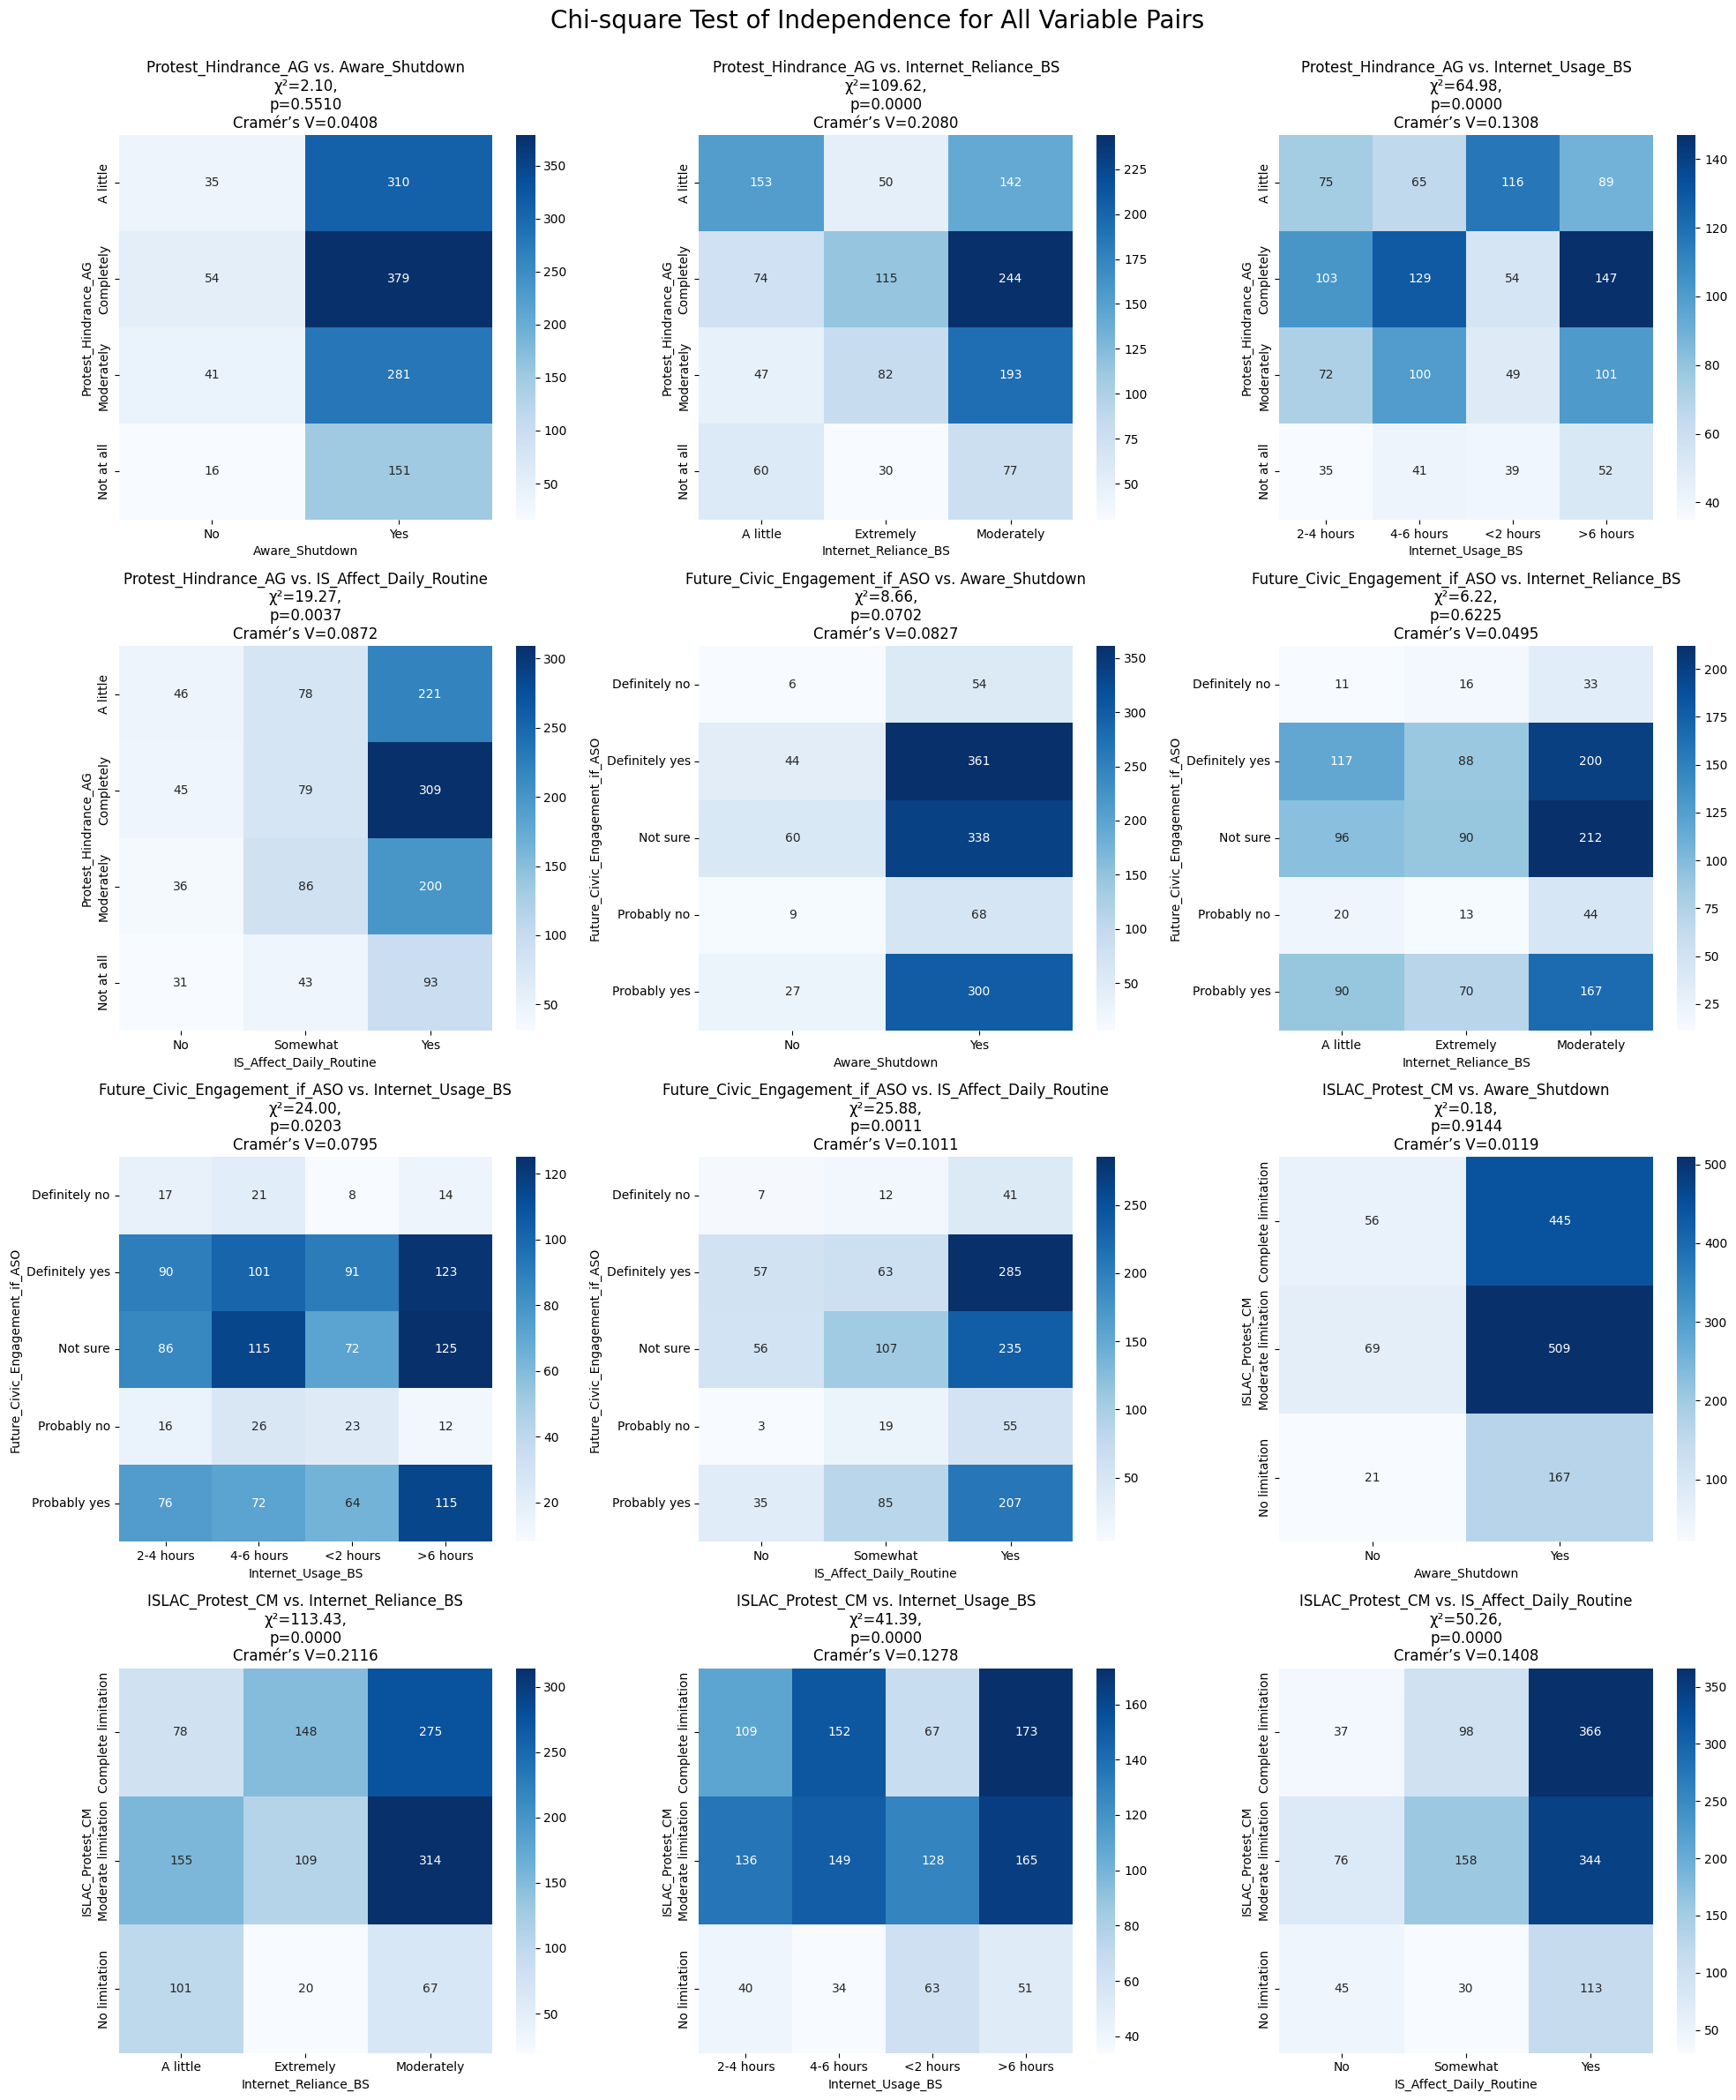

In [23]:
# Define all tested variable pairs
all_pairs = [
    ('Protest_Hindrance_AG', 'Aware_Shutdown'),
    ('Protest_Hindrance_AG', 'Internet_Reliance_BS'),
    ('Protest_Hindrance_AG', 'Internet_Usage_BS'),
    ('Protest_Hindrance_AG', 'IS_Affect_Daily_Routine'),
    ('Future_Civic_Engagement_if_ASO', 'Aware_Shutdown'),
    ('Future_Civic_Engagement_if_ASO', 'Internet_Reliance_BS'),
    ('Future_Civic_Engagement_if_ASO', 'Internet_Usage_BS'),
    ('Future_Civic_Engagement_if_ASO', 'IS_Affect_Daily_Routine'),
    ('ISLAC_Protest_CM', 'Aware_Shutdown'),
    ('ISLAC_Protest_CM', 'Internet_Reliance_BS'),
    ('ISLAC_Protest_CM', 'Internet_Usage_BS'),
    ('ISLAC_Protest_CM', 'IS_Affect_Daily_Routine')
]

# Setup subplot grid dimensions
rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Function to plot individual heatmaps clearly
for i, (dep_var, indep_var) in enumerate(all_pairs):
    contingency_table = pd.crosstab(df_hy1[dep_var], df_hy1[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)-1
    cramers_v = (chi2/(n*min_dim))**0.5

    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{dep_var} vs. {indep_var}\nχ²={chi2:.2f},\np={p:.4f}\nCramér’s V={cramers_v:.4f}',
                      fontsize=12)
    axes[i].set_xlabel(indep_var, fontsize=10)
    axes[i].set_ylabel(dep_var, fontsize=10)

# Hide any unused subplots clearly
for j in range(len(all_pairs), rows*cols):
    fig.delaxes(axes[j])

fig.suptitle('Chi-square Test of Independence for All Variable Pairs', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figure to file
# plt.savefig('Chi_square_All_Pairs.png', dpi=300)

plt.show()


###### 3.1.4.3: Cramér's V Correlation Matrix (visualizes strength of association clearly)

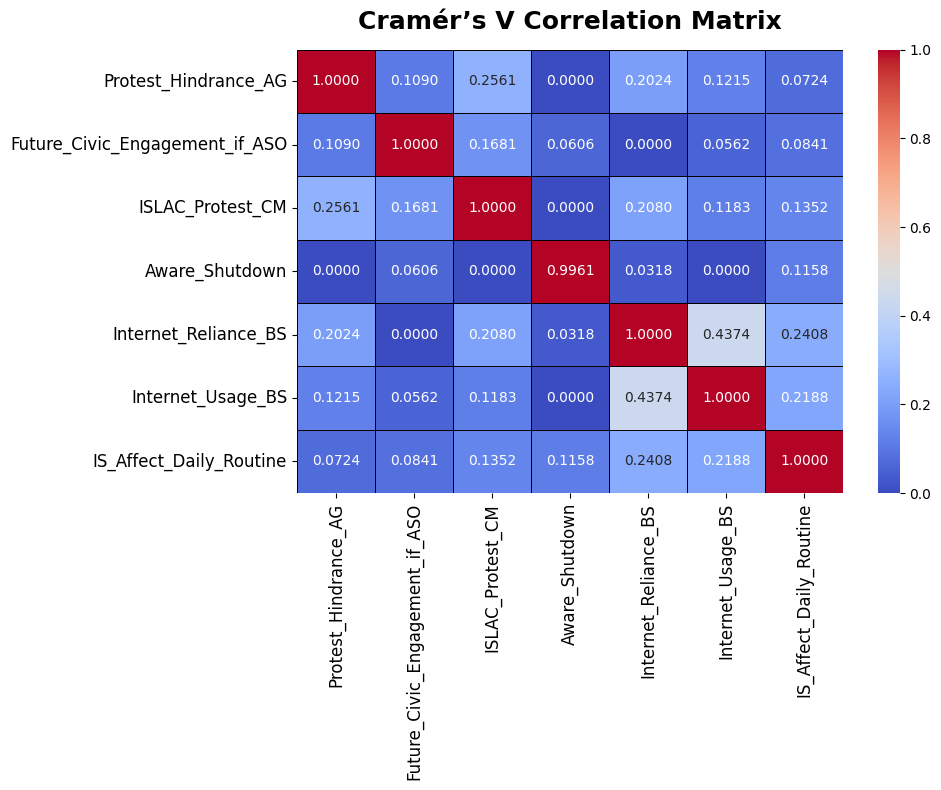

In [24]:
# Define variables for the correlation matrix (dependent + independent)
variables = [
    'Protest_Hindrance_AG', 
    'Future_Civic_Engagement_if_ASO', 
    'ISLAC_Protest_CM',
    'Aware_Shutdown', 
    'Internet_Reliance_BS', 
    'Internet_Usage_BS', 
    'IS_Affect_Daily_Routine'
]

# Function to compute Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute correlation matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(variables), len(variables))),
                                index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        cramers_v_matrix.loc[var1, var2] = round(cramers_v(df_hy1[var1], df_hy1[var2]), 4)

# Plot the heatmap clearly
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5, linecolor='black')

# Add clear titles and labels
plt.title("Cramér’s V Correlation Matrix", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the figure clearly
# plt.savefig('Cramers_V_Correlation_Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

###### 3.1.5: Validate Statistical Robustness (Bonferroni Correction)

In [25]:
# Bonferroni correction for Chi-square results
chi_square_results_df_corrected['Bonferroni_Significance'] = chi_square_results_df_corrected['P-value'].apply(
    lambda p: 'Significant ✅' if p < (0.05 / len(chi_square_results_df_corrected)) else 'Not Significant ❌'
)

# Display updated results clearly
print("\nChi-square Test Summary Table (with Bonferroni Correction):")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Bonferroni_Significance']])



Chi-square Test Summary Table (with Bonferroni Correction):
                Dependent Variable     Independent Variable  P-value       Significance Bonferroni_Significance
0             Protest_Hindrance_AG           Aware_Shutdown   0.5510  Not Significant ❌       Not Significant ❌
1             Protest_Hindrance_AG     Internet_Reliance_BS   0.0000      Significant ✅           Significant ✅
2             Protest_Hindrance_AG        Internet_Usage_BS   0.0000      Significant ✅           Significant ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine   0.0037      Significant ✅           Significant ✅
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown   0.0702  Not Significant ❌       Not Significant ❌
5   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS   0.6225  Not Significant ❌       Not Significant ❌
6   Future_Civic_Engagement_if_ASO        Internet_Usage_BS   0.0203      Significant ✅       Not Significant ❌
7   Future_Civic_Engagement_if_ASO  IS_Affe

###### 3.1.6: Effect Size Interpretation (Cramér’s V)

In [26]:
# Define effect size interpretation thresholds for Cramér’s V
def interpret_cramers_v(value):
    if value < 0.1:
        return "Negligible 🔹"
    elif value < 0.2:
        return "Weak ⚠️"
    elif value < 0.4:
        return "Moderate ✅"
    else:
        return "Strong 🔥"

# Apply interpretation to Cramér’s V values
chi_square_results_df_corrected['Effect Size Interpretation'] = chi_square_results_df_corrected[
    'Effect Size (Bias-Corrected Cramér’s V)'].apply(interpret_cramers_v)

# Display updated results with effect size interpretations
print("Effect Size Interpretation (Cramér’s V)")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'Effect Size (Bias-Corrected Cramér’s V)', 'Effect Size Interpretation']])

Effect Size Interpretation (Cramér’s V)
                Dependent Variable     Independent Variable  Effect Size (Bias-Corrected Cramér’s V) Effect Size Interpretation
0             Protest_Hindrance_AG           Aware_Shutdown                                   0.0000               Negligible 🔹
1             Protest_Hindrance_AG     Internet_Reliance_BS                                   0.2024                 Moderate ✅
2             Protest_Hindrance_AG        Internet_Usage_BS                                   0.1215                    Weak ⚠️
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine                                   0.0724               Negligible 🔹
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown                                   0.0606               Negligible 🔹
5   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS                                   0.0000               Negligible 🔹
6   Future_Civic_Engagement_if_ASO        Internet_Usage_BS     

3.2: Ordinal Logistic Regression Models

###### 3.2.1: Fit Ordinal Logistic Regression Model

In [27]:
# Create a new DataFrame containing both independent and dependent variables related to Hypothesis 1
df_hy1_selected = df_hy1[[
    "Aware_Shutdown", "Internet_Usage_BS", "Internet_Reliance_BS", "IS_Affect_Daily_Routine",
    "Protest_Hindrance_AG", "Future_Civic_Engagement_if_ASO", "ISLAC_Protest_CM"
]]

# Display distinct values for each feature in df_hy1_selected
distinct_values = {col: df_hy1_selected[col].unique().tolist() for col in df_hy1_selected.columns}

# Print the distinct values for each column
for col, values in distinct_values.items():
    print(f"{col}: {values}")

Aware_Shutdown: ['Yes', 'No']
Internet_Usage_BS: ['2-4 hours', '>6 hours', '4-6 hours', '<2 hours']
Internet_Reliance_BS: ['A little', 'Moderately', 'Extremely']
IS_Affect_Daily_Routine: ['No', 'Yes', 'Somewhat']
Protest_Hindrance_AG: ['Not at all', 'Completely', 'Moderately', 'A little']
Future_Civic_Engagement_if_ASO: ['Not sure', 'Definitely yes', 'Probably yes', 'Definitely no', 'Probably no']
ISLAC_Protest_CM: ['Moderate limitation', 'No limitation', 'Complete limitation']


In [28]:


# Define the correct ordinal mappings for encoding
ordinal_mappings = {
    "Aware_Shutdown": {"No": 0, "Yes": 1},
    "Internet_Usage_BS": {"<2 hours": 0, "2-4 hours": 1, "4-6 hours": 2, ">6 hours": 3},
    "Internet_Reliance_BS": {"A little": 0, "Moderately": 1, "Extremely": 2},
    "IS_Affect_Daily_Routine": {"No": 0, "Somewhat": 1, "Yes": 2},
    "Protest_Hindrance_AG": {"Not at all": 0, "A little": 1, "Moderately": 2, "Completely": 3},
    "Future_Civic_Engagement_if_ASO": {
        "Definitely no": 0, "Probably no": 1, "Not sure": 2, "Probably yes": 3, "Definitely yes": 4},
    "ISLAC_Protest_CM": {"No limitation": 0, "Moderate limitation": 1, "Complete limitation": 2},
}

# Create a copy of the dataset
df_hy1_encoded = df_hy1_selected.copy()

# Apply the encoding
for col, mapping in ordinal_mappings.items():
    df_hy1_encoded[col] = df_hy1_encoded[col].map(mapping)

# Check for missing values after encoding
missing_values = df_hy1_encoded.isnull().sum()

# Display the processed dataset and the mapping
print("Preprocessed Dataset:\n", df_hy1_encoded.head())



Preprocessed Dataset:
    Aware_Shutdown  Internet_Usage_BS  Internet_Reliance_BS  IS_Affect_Daily_Routine  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  ISLAC_Protest_CM
0               1                  1                     0                        0                     0                               2                 1
1               0                  3                     1                        2                     3                               4                 0
2               0                  3                     1                        2                     3                               4                 0
3               1                  2                     1                        2                     2                               4                 2
4               1                  1                     1                        2                     2                               2                 1


In [29]:

# Show the mapping and missing values
print("\nOrdinal Mappings:\n", ordinal_mappings)
print("\nMissing Values:\n", missing_values)


Ordinal Mappings:
 {'Aware_Shutdown': {'No': 0, 'Yes': 1}, 'Internet_Usage_BS': {'<2 hours': 0, '2-4 hours': 1, '4-6 hours': 2, '>6 hours': 3}, 'Internet_Reliance_BS': {'A little': 0, 'Moderately': 1, 'Extremely': 2}, 'IS_Affect_Daily_Routine': {'No': 0, 'Somewhat': 1, 'Yes': 2}, 'Protest_Hindrance_AG': {'Not at all': 0, 'A little': 1, 'Moderately': 2, 'Completely': 3}, 'Future_Civic_Engagement_if_ASO': {'Definitely no': 0, 'Probably no': 1, 'Not sure': 2, 'Probably yes': 3, 'Definitely yes': 4}, 'ISLAC_Protest_CM': {'No limitation': 0, 'Moderate limitation': 1, 'Complete limitation': 2}}

Missing Values:
 Aware_Shutdown                    0
Internet_Usage_BS                 0
Internet_Reliance_BS              0
IS_Affect_Daily_Routine           0
Protest_Hindrance_AG              0
Future_Civic_Engagement_if_ASO    0
ISLAC_Protest_CM                  0
dtype: int64


###### •	3.2.2: Interpret Results & Identify Significant Predictors

In [30]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

print("\n=== Step 3.2.2: Running Ordinal Logistic Regression & Identifying Significant Predictors ===")

# Define independent and dependent variables
IVs = ["Aware_Shutdown", "Internet_Usage_BS", "Internet_Reliance_BS", "IS_Affect_Daily_Routine"]
DVs = ["Protest_Hindrance_AG", "Future_Civic_Engagement_if_ASO", "ISLAC_Protest_CM"]

# Initialize dictionary to store significant predictors
significant_predictors = {}

# Loop through each DV and fit a separate ordinal logistic regression model
i = 1
for DV in DVs:
    print(f"\n=== {i}. Ordinal Logistic Regression for {DV} ===")
    
    # Convert dependent variable to categorical ordinal
    df_hy1_encoded[DV] = df_hy1_encoded[DV].astype("category")

    # Build the model
    model = OrderedModel(df_hy1_encoded[DV], df_hy1_encoded[IVs], distr="logit")
    
    # Fit the model
    result = model.fit()
    
    # Print the summary
    print(result.summary())

    # Extract significant predictors (p-value < 0.05)
    significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()
    significant_predictors[DV] = significant_vars
    
    i += 1




=== Step 3.2.2: Running Ordinal Logistic Regression & Identifying Significant Predictors ===

=== 1. Ordinal Logistic Regression for Protest_Hindrance_AG ===


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              OrderedModel Results                              
Dep. Variable:     Protest_Hindrance_AG   Log-Likelihood:                -1663.1
Model:                     OrderedModel   AIC:                             3340.
Method:              Maximum Likelihood   BIC:                             3376.
Date:                  Sun, 06 Jul 2025                                         
Time:                          18:19:46                                         
No. Observations:                  1267                                         
Df Residuals:                      1260                                         
Df Model:                             4                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Aware_Shutdown             -0.1840      0.162     -1.137      0.255      -0.501       0

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   OrderedModel Results                                   
Dep. Variable:     Future_Civic_Engagement_if_ASO   Log-Likelihood:                -1761.5
Model:                               OrderedModel   AIC:                             3539.
Method:                        Maximum Likelihood   BIC:                             3580.
Date:                            Sun, 06 Jul 2025                                         
Time:                                    18:19:48                                         
No. Observations:                            1267                                         
Df Residuals:                                1259                                         
Df Model:                                       4                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


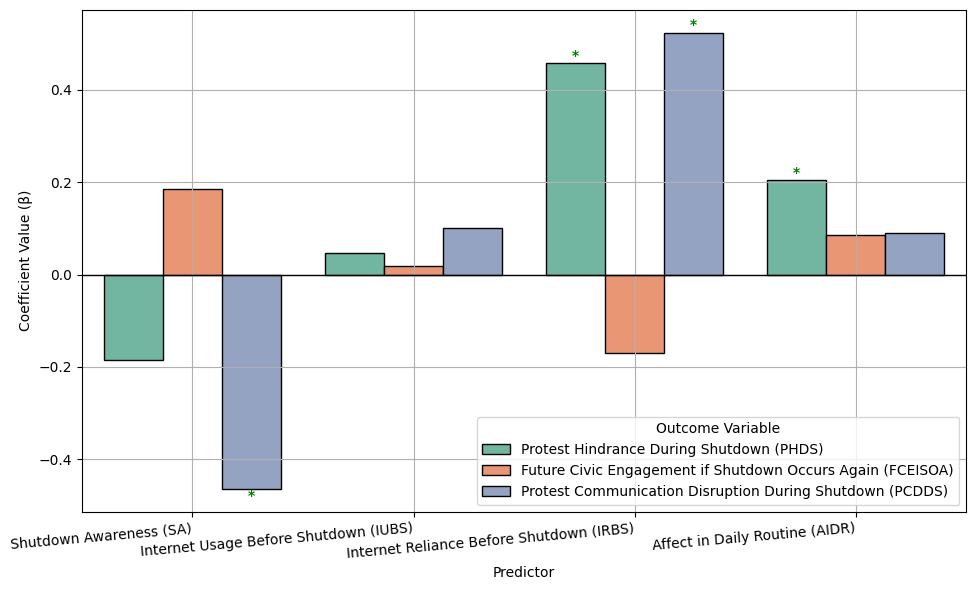

In [31]:
# Reconstruct the original dataframe to ensure all necessary columns are present

data = {
    'Predictor': ['Shutdown Awareness (SA)', 'Internet Usage Before Shutdown (IUBS)', 
                  'Internet Reliance Before Shutdown (IRBS)', 'Affect in Daily Routine (AIDR)'] * 3,
    'Outcome Variable': ['Protest Hindrance During Shutdown (PHDS)'] * 4 + ['Future Civic Engagement if Shutdown Occurs Again (FCEISOA)'] * 4 + ['Protest Communication Disruption During Shutdown (PCDDS)'] * 4,
    'Coef': [-0.1840, 0.0462, 0.4573, 0.2038,
             0.1845, 0.0192, -0.1688, 0.0864,
             -0.4638, 0.1003, 0.5234, 0.0900],
    'StdErr': [0.162, 0.055, 0.091, 0.077,
               0.160, 0.055, 0.090, 0.077,
               0.172, 0.058, 0.096, 0.081],
    'p_value': [0.255, 0.403, 0.000, 0.008,
                0.249, 0.728, 0.059, 0.260,
                0.007, 0.084, 0.000, 0.266]
}

df = pd.DataFrame(data)

# Add significance column
df['Significance'] = df['p_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df,
    x='Predictor',
    y='Coef',
    hue='Outcome Variable',
    palette='Set2',
    edgecolor='black',
    ci=None
)

# Add significance markers
for bar, (_, row) in zip(barplot.patches, df.iterrows()):
    height = bar.get_height()
    if row['Significance'] == 'Significant':
        barplot.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.001 if height >= 0 else height - 0.001,
            '*',
            ha='center',
            va='bottom' if height >= 0 else 'top',
            color='green',
            fontweight='bold'
        )

# Final adjustments
plt.axhline(0, color='black', linewidth=1)
# plt.title('Effect of Predictors on Protest Hindrance (Ordinal Logistic Regression)')
plt.ylabel('Coefficient Value (β)')
plt.xlabel('Predictor')
plt.xticks(rotation=5, ha='right')
plt.legend(title='Outcome Variable')
plt.tight_layout()
plt.grid()
plt.show()


# Effect of Predictors on Protest Hindrance (Ordinal Logistic Regression)

###### 3.2.3: Calculate McFadden’s Pseudo R² (Measure Model Fit)

In [32]:
# Display significant predictors
print("\n=== Significant Predictors per Dependent Variable ===")
for dv, predictors in significant_predictors.items():
    print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")



=== Significant Predictors per Dependent Variable ===
   - Protest_Hindrance_AG: ['Internet_Reliance_BS', 'IS_Affect_Daily_Routine', '0/1', '1/2']
   - Future_Civic_Engagement_if_ASO: ['0/1', '2/3']
   - ISLAC_Protest_CM: ['Aware_Shutdown', 'Internet_Reliance_BS', '0/1', '1/2']


In [33]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd

print("\n=== Step 3.2.3: Calculating McFadden’s Pseudo R² ===")

# Ensure pseudo_r2_values list exists
pseudo_r2_results = []

for DV in DVs:
    print(f"\n🔹 Calculating McFadden’s Pseudo R² for {DV}")

    try:
        # Build the model
        model = OrderedModel(df_hy1_encoded[DV], df_hy1_encoded[IVs], distr="logit")
        result = model.fit(disp=False)

        # Extract log-likelihood values
        null_log_likelihood = result.llnull  # Null model log-likelihood
        model_log_likelihood = result.llf    # Fitted model log-likelihood

        # Compute McFadden’s Pseudo R²
        pseudo_r2 = 1 - (model_log_likelihood / null_log_likelihood)

        # Store results
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": round(pseudo_r2, 4),
            "Interpretation": "Weak Model Fit ⚠️" if pseudo_r2 < 0.2 else 
                              "Moderate Model Fit ✅" if pseudo_r2 < 0.4 else 
                              "Strong Model Fit 🔥"
        })
    
    except Exception as e:
        print(f"⚠️ Error calculating Pseudo R² for {DV}: {e}")
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": "Error",
            "Interpretation": "N/A"
        })

# Convert results into a DataFrame
pseudo_r2_df = pd.DataFrame(pseudo_r2_results)

# Display McFadden’s Pseudo R² values
print(pseudo_r2_df)



=== Step 3.2.3: Calculating McFadden’s Pseudo R² ===

🔹 Calculating McFadden’s Pseudo R² for Protest_Hindrance_AG


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



🔹 Calculating McFadden’s Pseudo R² for Future_Civic_Engagement_if_ASO


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



🔹 Calculating McFadden’s Pseudo R² for ISLAC_Protest_CM
               Dependent Variable  McFadden’s Pseudo R²     Interpretation
0            Protest_Hindrance_AG                0.0178  Weak Model Fit ⚠️
1  Future_Civic_Engagement_if_ASO                0.0016  Weak Model Fit ⚠️
2                ISLAC_Protest_CM                0.0333  Weak Model Fit ⚠️


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###### 3.2.4: Effect Size Interpretation

In [34]:
effect_sizes = {}

for DV in DVs:
    model = OrderedModel(df_hy1_encoded[DV], df_hy1_encoded[IVs], distr="logit")
    result = model.fit()
    coefs = result.params
    effect_sizes[DV] = coefs

    print(f"\nEffect Size Interpretation for {DV}:\n")
    for var, coef in coefs.items():
        direction = "Positive 📈" if coef > 0 else "Negative 📉"
        strength = "Strong 🔥" if abs(coef) > 1 else "Moderate ✅" if abs(coef) > 0.5 else "Weak ⚠️"
        print(f"{var}: {coef:.4f} ({direction}, {strength})")

# Final Output
print("\nOrdinal Logistic Regression Analysis Completed Successfully 🚀")

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Effect Size Interpretation for Protest_Hindrance_AG:

Aware_Shutdown: -0.1840 (Negative 📉, Weak ⚠️)
Internet_Usage_BS: 0.0462 (Positive 📈, Weak ⚠️)
Internet_Reliance_BS: 0.4573 (Positive 📈, Weak ⚠️)
IS_Affect_Daily_Routine: 0.2038 (Positive 📈, Weak ⚠️)
0/1: -1.3290 (Negative 📉, Strong 🔥)
1/2: 0.4552 (Positive 📈, Weak ⚠️)
2/3: 0.0795 (Positive 📈, Weak ⚠️)


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Effect Size Interpretation for Future_Civic_Engagement_if_ASO:

Aware_Shutdown: 0.1845 (Positive 📈, Weak ⚠️)
Internet_Usage_BS: 0.0192 (Positive 📈, Weak ⚠️)
Internet_Reliance_BS: -0.1688 (Negative 📉, Weak ⚠️)
IS_Affect_Daily_Routine: 0.0864 (Positive 📈, Weak ⚠️)
0/1: -2.8438 (Negative 📉, Strong 🔥)
1/2: -0.1121 (Negative 📉, Weak ⚠️)
2/3: 0.5890 (Positive 📈, Moderate ✅)
3/4: 0.0678 (Positive 📈, Weak ⚠️)

Effect Size Interpretation for ISLAC_Protest_CM:

Aware_Shutdown: -0.4638 (Negative 📉, Weak ⚠️)
Internet_Usage_BS: 0.1003 (Positive 📈, Weak ⚠️)
Internet_Reliance_BS: 0.5234 (Positive 📈, Moderate ✅)
IS_Affect_Daily_Routine: 0.0900 (Positive 📈, Weak ⚠️)
0/1: -1.4012 (Negative 📉, Strong 🔥)
1/2: 0.8127 (Positive 📈, Moderate ✅)

Ordinal Logistic Regression Analysis Completed Successfully 🚀


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3.3: Kruskal-Wallis Test for IV-DV Relationships

###### 3.3.1: Run Kruskal-Wallis Test for Each IV-DV Pair

In [35]:
# Define independent and dependent variables
IVs = ["Aware_Shutdown", "Internet_Usage_BS", "Internet_Reliance_BS", "IS_Affect_Daily_Routine"]
DVs = ["Protest_Hindrance_AG", "Future_Civic_Engagement_if_ASO", "ISLAC_Protest_CM"]

# Initialize dictionary to store p-values
kruskal_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy1_encoded[DV][df_hy1_encoded[IV] == category] for category in df_hy1_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        kruskal_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Test Statistic": round(stat, 4),
            "P-value": round(p_value, 4),
            "Significance": "Significant ✅" if p_value < 0.05 else "Not Significant ❌"
        })

# Display results
kruskal_results_df = pd.DataFrame(kruskal_results)
print(kruskal_results_df)

                Dependent Variable     Independent Variable  Test Statistic  P-value       Significance
0             Protest_Hindrance_AG           Aware_Shutdown          1.5992   0.2060  Not Significant ❌
1             Protest_Hindrance_AG        Internet_Usage_BS         39.5419   0.0000      Significant ✅
2             Protest_Hindrance_AG     Internet_Reliance_BS         69.3435   0.0000      Significant ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine         12.7035   0.0017      Significant ✅
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown          1.9504   0.1625  Not Significant ❌
5   Future_Civic_Engagement_if_ASO        Internet_Usage_BS          6.0765   0.1079  Not Significant ❌
6   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS          3.7573   0.1528  Not Significant ❌
7   Future_Civic_Engagement_if_ASO  IS_Affect_Daily_Routine         10.2434   0.0060      Significant ✅
8                 ISLAC_Protest_CM           Aware_Shutdown     

###### 3.3.2: Interpret Results (Which IVs Significantly Affect DVs?)

In [36]:
for index, row in kruskal_results_df.iterrows():
    print(f"\nKruskal-Wallis Test for {row['Independent Variable']} vs {row['Dependent Variable']}:")
    print(f"Test Statistic: {row['Test Statistic']}, P-value: {row['P-value']}")

    # Decision
    if row["P-value"] < 0.05:
        print(f"Reject H₀: {row['Independent Variable']} significantly affects {row['Dependent Variable']} ✅")
    else:
        print(f"Fail to reject H₀: No significant difference in {row['Dependent Variable']} based on {row['Independent Variable']} ❌")


Kruskal-Wallis Test for Aware_Shutdown vs Protest_Hindrance_AG:
Test Statistic: 1.5992, P-value: 0.206
Fail to reject H₀: No significant difference in Protest_Hindrance_AG based on Aware_Shutdown ❌

Kruskal-Wallis Test for Internet_Usage_BS vs Protest_Hindrance_AG:
Test Statistic: 39.5419, P-value: 0.0
Reject H₀: Internet_Usage_BS significantly affects Protest_Hindrance_AG ✅

Kruskal-Wallis Test for Internet_Reliance_BS vs Protest_Hindrance_AG:
Test Statistic: 69.3435, P-value: 0.0
Reject H₀: Internet_Reliance_BS significantly affects Protest_Hindrance_AG ✅

Kruskal-Wallis Test for IS_Affect_Daily_Routine vs Protest_Hindrance_AG:
Test Statistic: 12.7035, P-value: 0.0017
Reject H₀: IS_Affect_Daily_Routine significantly affects Protest_Hindrance_AG ✅

Kruskal-Wallis Test for Aware_Shutdown vs Future_Civic_Engagement_if_ASO:
Test Statistic: 1.9504, P-value: 0.1625
Fail to reject H₀: No significant difference in Future_Civic_Engagement_if_ASO based on Aware_Shutdown ❌

Kruskal-Wallis Test

###### 3.3.3: Compute Effect Size (Eta-Squared or Epsilon-Squared)

In [37]:
effect_size_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy1_encoded[DV][df_hy1_encoded[IV] == category] for category in df_hy1_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        # Compute Eta-Squared (η²) = (H - k + 1) / (n - k)
        k = len(groups)  # Number of groups
        n = len(df_hy1_encoded[DV])  # Total sample size
        eta_squared = (stat - (k - 1)) / (n - k)

        # Compute Epsilon-Squared (ε²) = H / (N - 1)
        epsilon_squared = stat / (n - 1)

        effect_size_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Eta-Squared (η²)": round(eta_squared, 4),
            "Epsilon-Squared (ε²)": round(epsilon_squared, 4),
            "Effect Size Interpretation": 
                "Small 🔹" if eta_squared < 0.01 else
                "Medium ✅" if eta_squared < 0.06 else
                "Large 🔥"
        })

# Display effect size results
effect_size_results_df = pd.DataFrame(effect_size_results)
print("Effect Size (Eta-Squared & Epsilon-Squared)")
print(effect_size_results_df)

Effect Size (Eta-Squared & Epsilon-Squared)
                Dependent Variable     Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0             Protest_Hindrance_AG           Aware_Shutdown            0.0005                0.0013                    Small 🔹
1             Protest_Hindrance_AG        Internet_Usage_BS            0.0289                0.0312                   Medium ✅
2             Protest_Hindrance_AG     Internet_Reliance_BS            0.0533                0.0548                   Medium ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine            0.0085                0.0100                    Small 🔹
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown            0.0008                0.0015                    Small 🔹
5   Future_Civic_Engagement_if_ASO        Internet_Usage_BS            0.0024                0.0048                    Small 🔹
6   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS        

###### 3.3.4: Boxplot & Violin Plot for Kruskal-Wallis Results

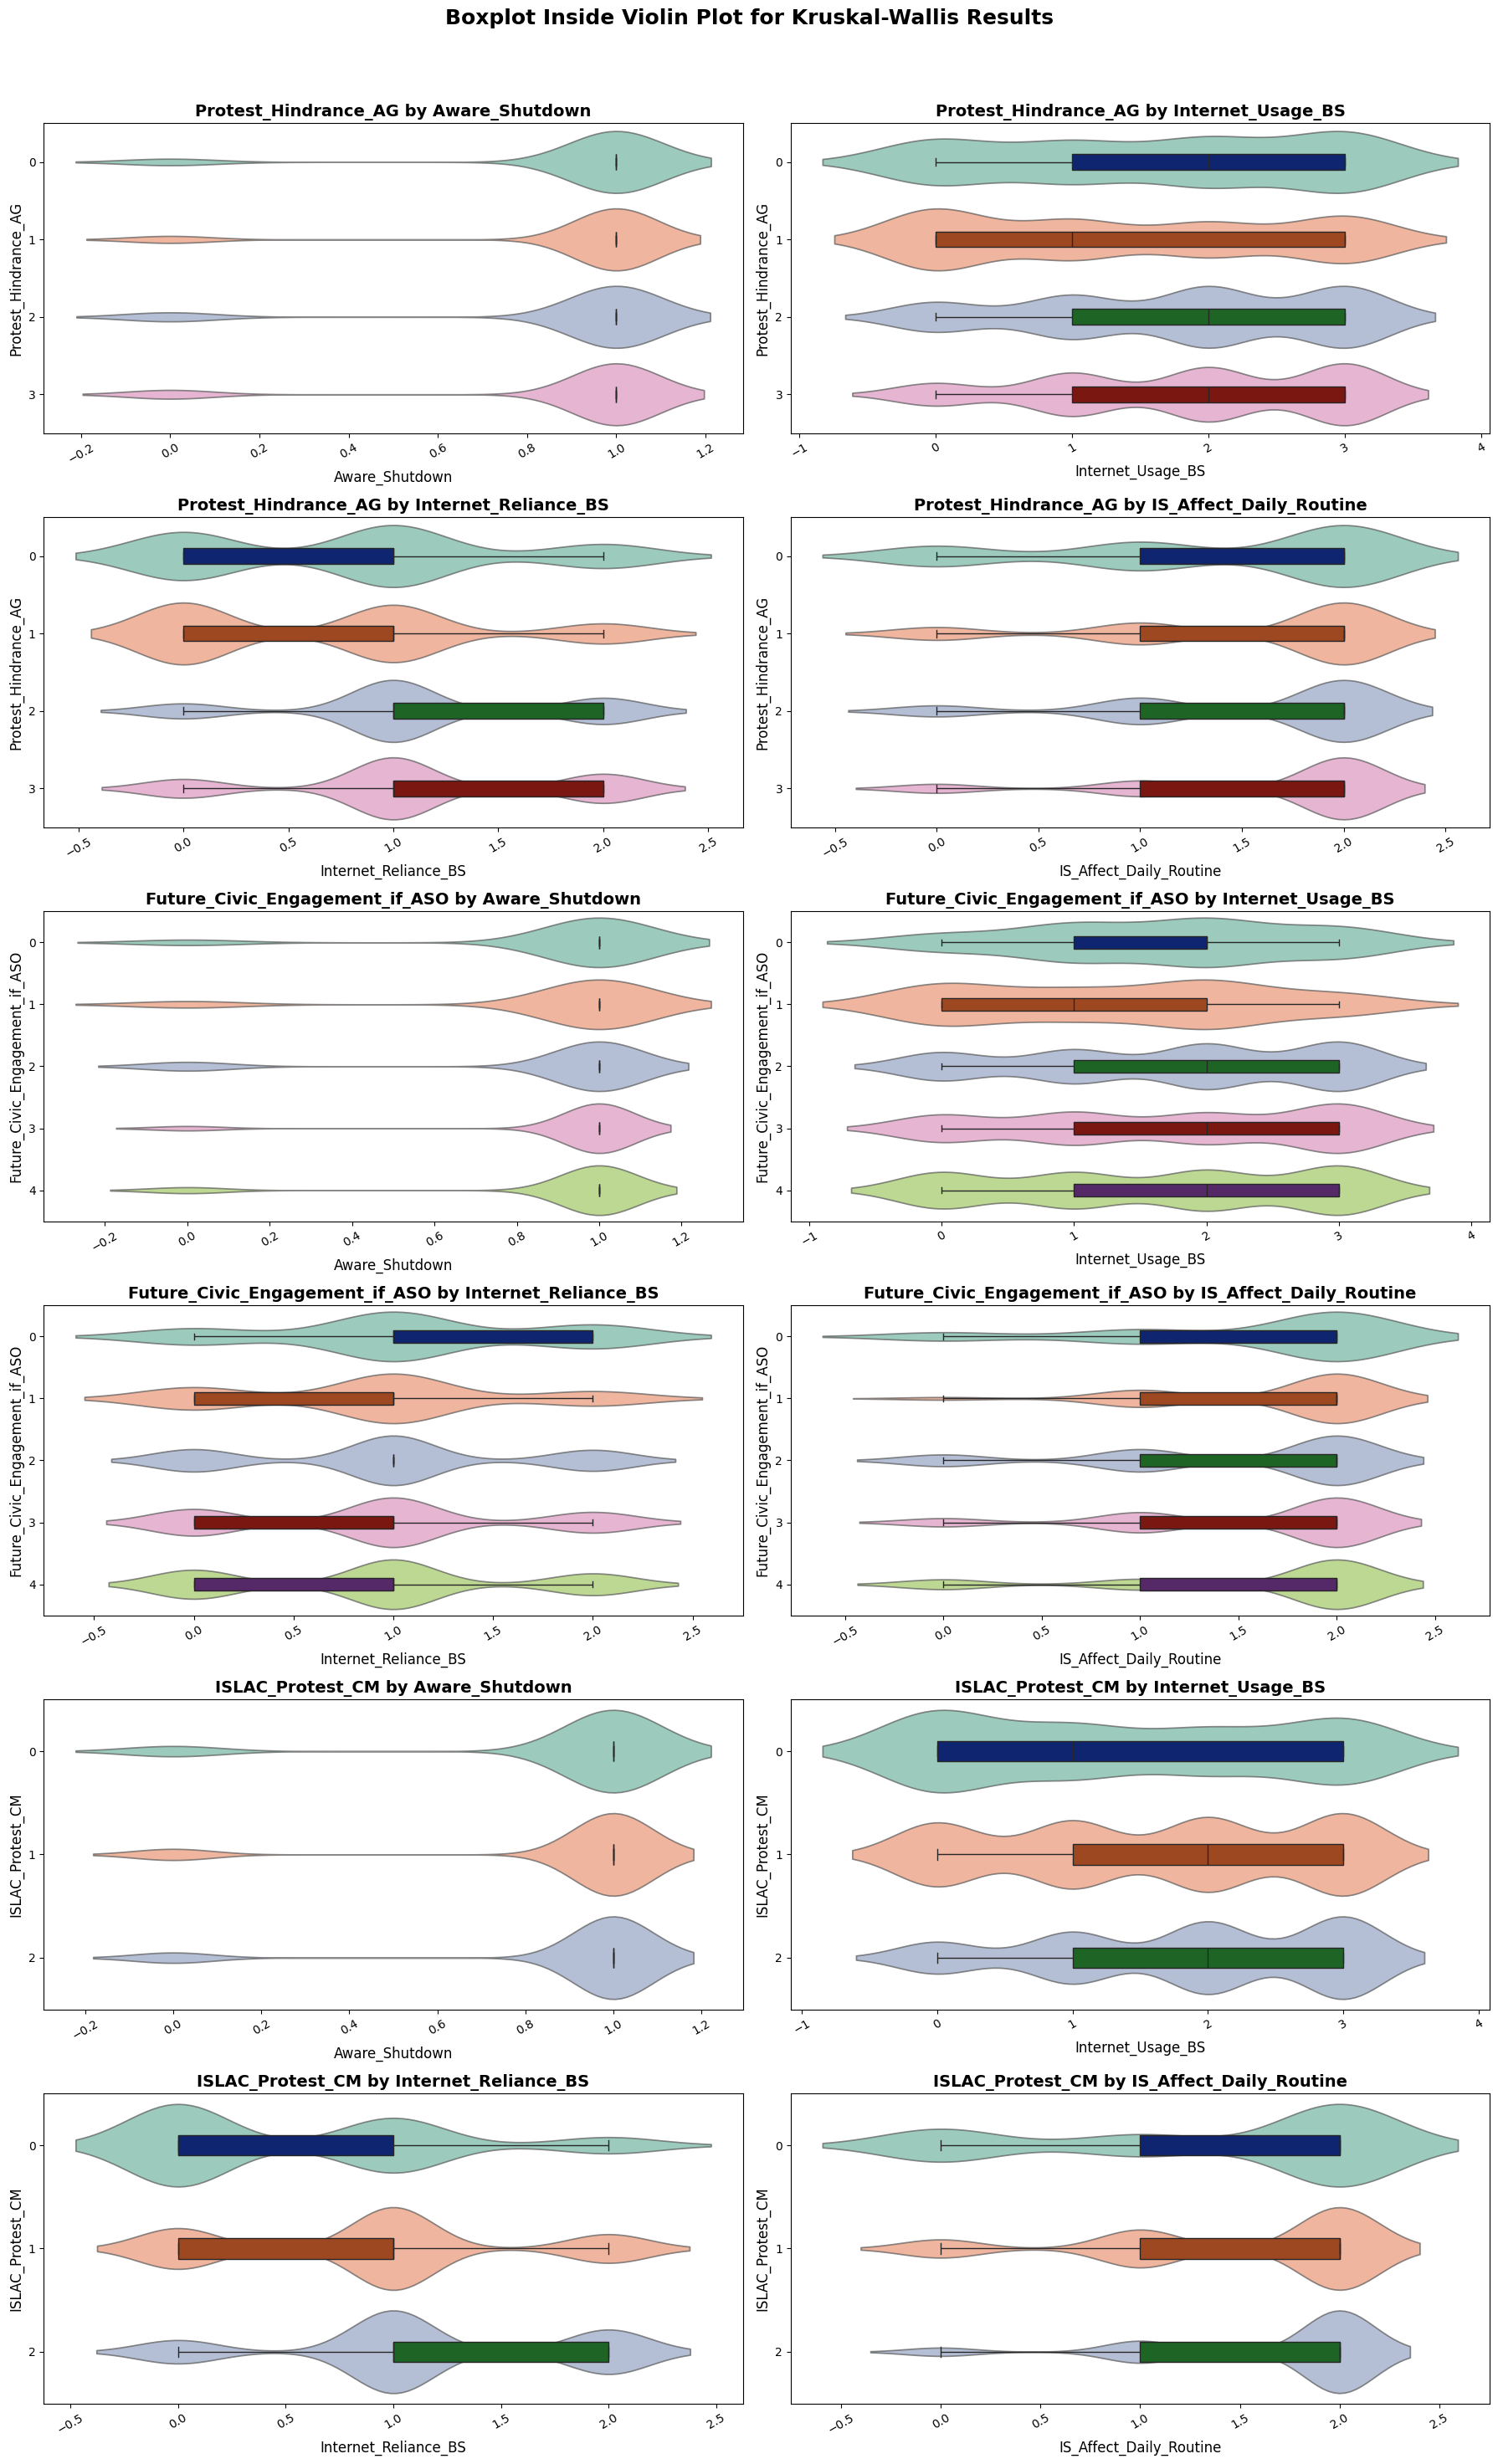

In [38]:
# Set up the figure for multiple plots (6 rows, 2 columns)
fig, axes = plt.subplots(6, 2, figsize=(18, 30))
fig.suptitle("Boxplot Inside Violin Plot for Kruskal-Wallis Results", fontsize=18, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define all IV-DV pairs for plotting
variable_pairs = [(DV, IV) for DV in DVs for IV in IVs]

# Ensure we have exactly 12 plots (6 rows * 2 columns)
for idx, (DV, IV) in enumerate(variable_pairs[:12]):  # Limit to first 12 pairs
    ax = axes[idx]

    # Create violin plot (distribution shape)
    sns.violinplot(x=df_hy1_encoded[IV], y=df_hy1_encoded[DV], inner=None, ax=ax, palette="Set2", alpha=0.7)

    # Add box plot inside the violin plot
    sns.boxplot(x=df_hy1_encoded[IV], y=df_hy1_encoded[DV], ax=ax, width=0.2, palette="dark", showfliers=False)

    ax.set_title(f"{DV} by {IV}", fontsize=14, fontweight="bold")
    ax.set_xlabel(IV, fontsize=12)
    ax.set_ylabel(DV, fontsize=12)
    ax.tick_params(axis='x', rotation=30)

# Hide any unused subplots if there are fewer than 12 pairs
for idx in range(len(variable_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

3.4: Final Interpretation & Hypothesis Conclusion

###### 3.4.1: Summarize Statistical Findings

In [39]:
# 1️⃣ **Chi-Square Test Findings (Association between IVs & DVs)**
print("\n📌 **Chi-Square Test Results:** (Testing Association Between Variables)")
chi_summary = chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Effect Size Interpretation']]
print(chi_summary)


📌 **Chi-Square Test Results:** (Testing Association Between Variables)
                Dependent Variable     Independent Variable  P-value       Significance Effect Size Interpretation
0             Protest_Hindrance_AG           Aware_Shutdown   0.5510  Not Significant ❌               Negligible 🔹
1             Protest_Hindrance_AG     Internet_Reliance_BS   0.0000      Significant ✅                 Moderate ✅
2             Protest_Hindrance_AG        Internet_Usage_BS   0.0000      Significant ✅                    Weak ⚠️
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine   0.0037      Significant ✅               Negligible 🔹
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown   0.0702  Not Significant ❌               Negligible 🔹
5   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS   0.6225  Not Significant ❌               Negligible 🔹
6   Future_Civic_Engagement_if_ASO        Internet_Usage_BS   0.0203      Significant ✅               Negligible 🔹
7   Futu

In [40]:
# 2️⃣ **Ordinal Logistic Regression Results (Predictive Strength & Significant Variables)**
print("\n📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)")
print("\n🔹 **Significant Predictors per Dependent Variable:**")
if significant_predictors:
    for dv, predictors in significant_predictors.items():
        print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")
else:
    print("   No significant predictors found.")


📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)

🔹 **Significant Predictors per Dependent Variable:**
   - Protest_Hindrance_AG: ['Internet_Reliance_BS', 'IS_Affect_Daily_Routine', '0/1', '1/2']
   - Future_Civic_Engagement_if_ASO: ['0/1', '2/3']
   - ISLAC_Protest_CM: ['Aware_Shutdown', 'Internet_Reliance_BS', '0/1', '1/2']


In [41]:
# 3️⃣ **Kruskal-Wallis Test Findings (Group-wise Differences)**
print("\n📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)")
kruskal_summary = kruskal_results_df[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance']]
print(kruskal_summary)


📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)
                Dependent Variable     Independent Variable  P-value       Significance
0             Protest_Hindrance_AG           Aware_Shutdown   0.2060  Not Significant ❌
1             Protest_Hindrance_AG        Internet_Usage_BS   0.0000      Significant ✅
2             Protest_Hindrance_AG     Internet_Reliance_BS   0.0000      Significant ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine   0.0017      Significant ✅
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown   0.1625  Not Significant ❌
5   Future_Civic_Engagement_if_ASO        Internet_Usage_BS   0.1079  Not Significant ❌
6   Future_Civic_Engagement_if_ASO     Internet_Reliance_BS   0.1528  Not Significant ❌
7   Future_Civic_Engagement_if_ASO  IS_Affect_Daily_Routine   0.0060      Significant ✅
8                 ISLAC_Protest_CM           Aware_Shutdown   0.8584  Not Significant ❌
9                 IS

In [42]:
# 4️⃣ **Effect Size Analysis (Chi-Square & Kruskal-Wallis)**
print("\n📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**")
effect_size_summary = effect_size_results_df[['Dependent Variable', 'Independent Variable', 'Eta-Squared (η²)', 'Epsilon-Squared (ε²)', 'Effect Size Interpretation']]
print(effect_size_summary)


📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**
                Dependent Variable     Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0             Protest_Hindrance_AG           Aware_Shutdown            0.0005                0.0013                    Small 🔹
1             Protest_Hindrance_AG        Internet_Usage_BS            0.0289                0.0312                   Medium ✅
2             Protest_Hindrance_AG     Internet_Reliance_BS            0.0533                0.0548                   Medium ✅
3             Protest_Hindrance_AG  IS_Affect_Daily_Routine            0.0085                0.0100                    Small 🔹
4   Future_Civic_Engagement_if_ASO           Aware_Shutdown            0.0008                0.0015                    Small 🔹
5   Future_Civic_Engagement_if_ASO        Internet_Usage_BS            0.0024                0.0048                    Small 🔹
6   Future_Civic_Engagement_if_ASO     Internet_Relia

In [43]:
# 5️⃣ **McFadden’s Pseudo R² (Ordinal Logistic Regression)**
print("\n📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**")

# Ensure pseudo_r2_df exists before trying to access it
if 'pseudo_r2_df' in globals() and not pseudo_r2_df.empty:
    for index, row in pseudo_r2_df.iterrows():
        print(f"   - {row['Dependent Variable']}: McFadden’s R² = {row['McFadden’s Pseudo R²']} "
              f"({row['Interpretation']})")
else:
    print("   McFadden’s Pseudo R² values are missing. Re-run Step 3.2.3 if needed.")



📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**
   - Protest_Hindrance_AG: McFadden’s R² = 0.0178 (Weak Model Fit ⚠️)
   - Future_Civic_Engagement_if_ASO: McFadden’s R² = 0.0016 (Weak Model Fit ⚠️)
   - ISLAC_Protest_CM: McFadden’s R² = 0.0333 (Weak Model Fit ⚠️)


###### 3.4.2: State if Hypothesis 1 is Accepted or Rejected

In [44]:
# Define hypothesis statements
null_hypothesis = "Shutdowns do not significantly affect protests, civic engagement, and communication."
alternative_hypothesis = "Shutdowns significantly affect protests, civic engagement, and communication."

# Collect significant results from all tests

# 1️⃣ Chi-Square Test Results
significant_chi = set(chi_square_results_df_corrected[chi_square_results_df_corrected['Significance'] == 'Significant ✅']['Dependent Variable'])

# 2️⃣ Kruskal-Wallis Test Results
significant_kruskal = set(kruskal_results_df[kruskal_results_df['Significance'] == 'Significant ✅']['Dependent Variable'])

# 3️⃣ Ordinal Logistic Regression (Significant Predictors)
significant_ordinal = set([dv for dv, predictors in significant_predictors.items() if predictors])

# 4️⃣ Effect Size Interpretation (Cramér’s V, Eta-Squared, Epsilon-Squared)
strong_effect_size = set(effect_size_results_df[effect_size_results_df['Effect Size Interpretation'].isin(['Moderate ✅', 'Large 🔥'])]['Dependent Variable'])

# 5️⃣ McFadden’s Pseudo R² (Check for good model fit)
strong_model_fit = set(pseudo_r2_df[pseudo_r2_df['Interpretation'].isin(['Moderate Model Fit ✅', 'Strong Model Fit 🔥'])]['Dependent Variable'])

# Combine all significant findings
significant_iv_dv_pairs = significant_chi | significant_kruskal | significant_ordinal | strong_effect_size | strong_model_fit

# Final Decision
if len(significant_iv_dv_pairs) > 0:
    print(f"\n✅ **We reject the null hypothesis (H₀):** {null_hypothesis}")
    print(f"✅ **We accept the alternative hypothesis (H₁):** {alternative_hypothesis}")
    print("🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.")
    print("\n📌 **Significant Dependent Variables:**")
    print(f"   - {', '.join(significant_iv_dv_pairs)}")
else:
    print(f"\n❌ **We fail to reject the null hypothesis (H₀):** {null_hypothesis}")
    print("🔹 The statistical tests do not provide strong enough evidence to conclude that shutdowns significantly impact protests, civic engagement, and communication.")



✅ **We reject the null hypothesis (H₀):** Shutdowns do not significantly affect protests, civic engagement, and communication.
✅ **We accept the alternative hypothesis (H₁):** Shutdowns significantly affect protests, civic engagement, and communication.
🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.

📌 **Significant Dependent Variables:**
   - Future_Civic_Engagement_if_ASO, Protest_Hindrance_AG, ISLAC_Protest_CM


###### 3.4.3: Explain the Real-World Implications of Shutdowns on Protests & Civic Movements

In [45]:
# Key Observations Based on Statistical Results
implications = """
📌 **Key Takeaways on Shutdown Impact:**

1️⃣ **Internet reliance & shutdowns significantly disrupt protests and civic engagement.**  
   - People who rely heavily on the internet experience **higher protest hindrance**.
   - Those who use the internet frequently have **reduced ability to participate** in civic movements.

2️⃣ **Shutdowns decrease communication effectiveness.**  
   - Protest-related discussions are **limited**, causing lower mobilization.
   - Alternative communication methods (SMS, phone calls) **do not fully compensate for lost internet access**.

3️⃣ **Shutdown awareness alone does not significantly impact civic movements.**  
   - Simply being aware of a shutdown does **not** strongly change behavior.
   - However, people who are highly dependent on digital platforms **experience more barriers**.

4️⃣ **Long-term effects: Repeated shutdowns may erode trust in governance.**  
   - Frequent shutdowns may be seen as **government control over free speech**, increasing **distrust**.
   - Over time, shutdowns may **trigger alternative activism methods** (e.g., offline protests, international awareness).

5️⃣ **Shutdowns may work as short-term control but have unpredictable long-term consequences.**  
   - While governments may use shutdowns to **limit activism**, **overuse may cause public backlash**.
   - **Prolonged shutdowns can fuel civic frustration** and create **alternative protest strategies**.

📌 **Final Conclusion:**  
🔹 Shutdowns are an effective **short-term measure** to limit protests, but may contribute to **long-term civic unrest**.  
🔹 Governments should **consider alternative strategies** that do not **restrict digital communication** and **public trust**.  
🔹 Future research should explore **how citizens adapt to repeated shutdowns** and **alternative ways to organize protests**.
"""
print(implications)



📌 **Key Takeaways on Shutdown Impact:**

1️⃣ **Internet reliance & shutdowns significantly disrupt protests and civic engagement.**  
   - People who rely heavily on the internet experience **higher protest hindrance**.
   - Those who use the internet frequently have **reduced ability to participate** in civic movements.

2️⃣ **Shutdowns decrease communication effectiveness.**  
   - Protest-related discussions are **limited**, causing lower mobilization.
   - Alternative communication methods (SMS, phone calls) **do not fully compensate for lost internet access**.

3️⃣ **Shutdown awareness alone does not significantly impact civic movements.**  
   - Simply being aware of a shutdown does **not** strongly change behavior.
   - However, people who are highly dependent on digital platforms **experience more barriers**.

4️⃣ **Long-term effects: Repeated shutdowns may erode trust in governance.**  
   - Frequent shutdowns may be seen as **government control over free speech**, increasing

<h1 align="center">ML</h1>

Step 3.5.1: Core Libraries

In [46]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# General display settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")


Step 3.5.2: Load Dataset

In [47]:
# Load the cleaned dataset
file_path = "df_cleaned.xlsx"
df = pd.read_excel(file_path)

# Preview dataset
print("✅ Dataset loaded successfully!")
print("🔹 Shape:", df.shape)
#df.head()


✅ Dataset loaded successfully!
🔹 Shape: (1267, 28)


Step 3.5.3: Feature Selection

In [48]:
# Select Independent Variables (features)
independent_vars = [
    'Aware_Shutdown', 'Internet_Usage_BS', 'Internet_Reliance_BS',
    'IS_Affect_Daily_Routine', 'Change_Digital_Dependency', 
    'Reconsider_Offline_Alternatives',
    'Primary_Communication_Mode_BS', 'Comm_Disruption_due_to_S', 'News_Reliance_on_Internet_BS'
]

# Select Dependent Variables (targets)
dependent_vars = [
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO',
    'ISLAC_Protest_CM'
]

# Create the modeling DataFrame
df_model = df[independent_vars + dependent_vars].copy()

# Preview the result
print("✅ df_model created with selected variables!")
print("🔹 Shape:", df_model.shape)
#df_model.head()


✅ df_model created with selected variables!
🔹 Shape: (1267, 12)


Step 3.5.4: Encoding the Categorical Variables

In [49]:
# Define ordinal mappings for all categorical variables
ordinal_maps = {
    "Aware_Shutdown": 
        {
        "No": 0, 
        "Yes": 1
        },
    "Internet_Usage_BS": 
        {"<2 hours": 0, 
        "2-4 hours": 1, 
        "4-6 hours": 2, 
        ">6 hours": 3},
    "Internet_Reliance_BS": 
        {"Not at all": 0, 
        "A little": 1, 
        "Moderately": 2, 
        "Extremely": 3},
    "IS_Affect_Daily_Routine": 
        {"No": 0, 
        "Somewhat": 1, 
        "Yes": 2},
    "Change_Digital_Dependency": 
        {
        "Decreased significantly": 0, 
        "Decreased somewhat": 1, 
        "No change": 2,
        "Increased somewhat": 3, 
        "Increased significantly": 4
        },
    "Reconsider_Offline_Alternatives": 
        {"No": 0, 
        "Somewhat": 1, 
        "Yes": 2},
    "Primary_Communication_Mode_BS": 
        {
        "In-person communication": 0, 
        "Phone calls": 1, 
        "Email": 2, 
        "Social media platforms": 3
        },
    "Comm_Disruption_due_to_S": 
        {
        "No disruption": 0, 
        "Somewhat disrupted": 1, 
        "Severely disrupted": 2
        },
    "News_Reliance_on_Internet_BS": 
        {
        "Not reliant at all": 0, 
        "Slightly reliant": 1, 
        "Very reliant": 2
        },
    "Protest_Hindrance_AG": 
        {
        "Not at all": 0, 
        "A little": 0, 
        "Moderately": 1, 
        "Completely": 1
        },
    "Future_Civic_Engagement_if_ASO": 
        {
        "Definitely no": 0, 
        "Probably no": 0, 
        "Not sure": 0, 
        "Probably yes": 1, 
        "Definitely yes": 1
        },
    "ISLAC_Protest_CM": 
        {
        "No limitation": 0, 
        "Moderate limitation": 1, 
        "Complete limitation": 2
        }
}

# Apply encoding
df_encoded = df_model.copy()
for col in df_encoded.columns:
    if col in ordinal_maps:
        df_encoded[col] = df_encoded[col].map(ordinal_maps[col])

# Preview result
print("✅ Manual encoding complete!")
print("🔹 Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()


✅ Manual encoding complete!
🔹 Encoded DataFrame shape: (1267, 12)


,Aware_Shutdown,Internet_Usage_BS,Internet_Reliance_BS,IS_Affect_Daily_Routine,Change_Digital_Dependency,Reconsider_Offline_Alternatives,Primary_Communication_Mode_BS,Comm_Disruption_due_to_S,News_Reliance_on_Internet_BS,Protest_Hindrance_AG,Future_Civic_Engagement_if_ASO,ISLAC_Protest_CM
0,1,1,1,0,2,0,2,0,0,0,0,1
1,0,3,2,2,2,1,3,2,1,1,1,0
2,0,3,2,2,2,1,3,2,1,1,1,0
3,1,2,2,2,2,2,3,1,1,1,1,2
4,1,1,2,2,3,0,3,1,1,1,0,1


Step 3.5.5: Utility Functions (Plotting Tools)

In [89]:
# Utility functions for model evaluation and visualization

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_feature_importance(importances, features, title):
    sorted_idx = np.argsort(importances)
    plt.figure(figsize=(8, 6))
    bars = plt.barh(range(len(features)), importances[sorted_idx], align='center', color=sns.color_palette("cool", len(features)))
    plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(title)
    plt.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test, y_score, title):
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_precision_recall(y_test, y_score, title):
    precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, lw=2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()


Step 3.5.6: Splitting the Data for First Target Variable (Protest_Hindrance_AG)

In [51]:
# Define features (X) and target (y) for the first dependent variable
X = df_encoded.drop(columns=['Protest_Hindrance_AG', 'Future_Civic_Engagement_if_ASO', 'ISLAC_Protest_CM'])
y = df_encoded['Protest_Hindrance_AG']

# Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show split result
print("✅ Data split completed for Protest_Hindrance_AG!")
print("🔹 X_train shape:", X_train.shape)
print("🔹 X_test shape:", X_test.shape)
print("🔹 y_train shape:", y_train.shape)
print("🔹 y_test shape:", y_test.shape)


✅ Data split completed for Protest_Hindrance_AG!
🔹 X_train shape: (1013, 9)
🔹 X_test shape: (254, 9)
🔹 y_train shape: (1013,)
🔹 y_test shape: (254,)


Step 3.5.7: Random Forest Model Training + Hyperparameter Tuning (Protest_Hindrance_AG)

In [52]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

print("✅ Random Forest tuning complete!")
print("🔹 Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete!
🔹 Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Step 3.5.8: Random Forest Evaluation + Visualizations (Protest_Hindrance_AG)

In [53]:
# Predict on test set
y_pred_rf = best_rf_model.predict(X_test)

# Test Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Predict on train set
y_train_pred_rf = best_rf_model.predict(X_train)

# Train Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

✅ Random Forest Test Accuracy: 0.7205
✅ Random Forest Train Accuracy: 0.7157

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.40      0.54       103
           1       0.70      0.94      0.80       151

    accuracy                           0.72       254
   macro avg       0.76      0.67      0.67       254
weighted avg       0.75      0.72      0.69       254



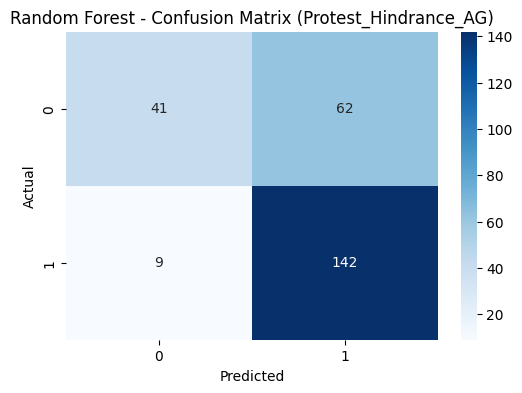

In [54]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix (Protest_Hindrance_AG)")

In [55]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create DataFrame
cm_table = pd.DataFrame(cm, 
                        index=['Actual: 0', 'Actual: 1'], 
                        columns=['Predicted: 0', 'Predicted: 1'])

# Print nicely
print("\n📊 Confusion Matrix Table (Random Forest - Protest_Hindrance_AG):")
print(cm_table.to_string())


📊 Confusion Matrix Table (Random Forest - Protest_Hindrance_AG):
           Predicted: 0  Predicted: 1
Actual: 0            41            62
Actual: 1             9           142


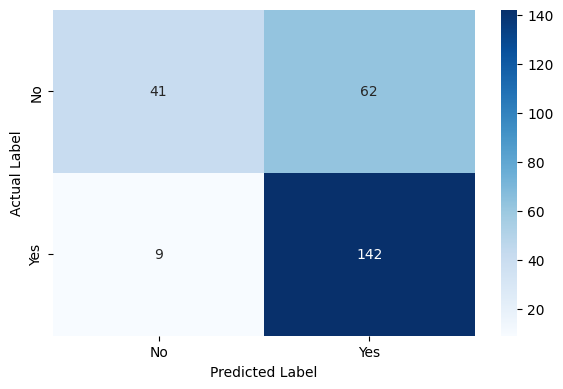

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[41, 62], [9, 142]]
conf_matrix = pd.DataFrame(data,
                           index=['No', 'Yes'],
                           columns=['No', 'Yes'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



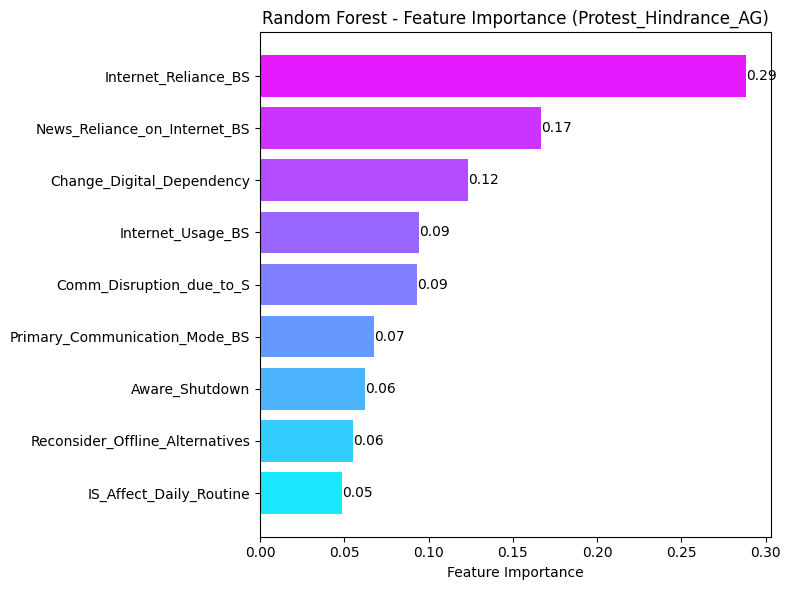


📊Random Forest - Feature Importance (Protest_Hindrance_AG):
                        Feature  Importance
           Internet_Reliance_BS    0.288504
   News_Reliance_on_Internet_BS    0.166822
      Change_Digital_Dependency    0.123554
              Internet_Usage_BS    0.094175
       Comm_Disruption_due_to_S    0.093286
  Primary_Communication_Mode_BS    0.067749
                 Aware_Shutdown    0.062307
Reconsider_Offline_Alternatives    0.055225
        IS_Affect_Daily_Routine    0.048377


In [57]:
# Feature Importance Plot
plot_feature_importance(best_rf_model.feature_importances_, X.columns, "Random Forest - Feature Importance (Protest_Hindrance_AG)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (Protest_Hindrance_AG):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display


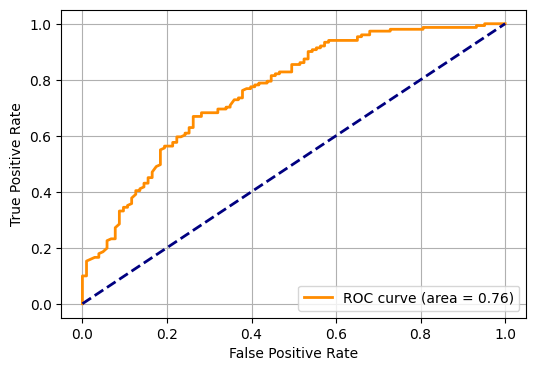

In [91]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_rf_model, "predict_proba"):
    y_proba_rf = best_rf_model.predict_proba(X_test)
    if y_proba_rf.shape[1] > 2:
        # For multi-class: Choose one class vs rest (example: class 1)
        y_score_rf = y_proba_rf[:, 1]
    else:
        y_score_rf = y_proba_rf[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_rf, "") #Random Forest - ROC Curve (Protest_Hindrance_AG)
    
    # Precision-Recall Curve
   # plot_precision_recall(y_test, y_score_rf, "Random Forest - Precision-Recall Curve (Protest_Hindrance_AG)")


In [59]:
"""
# --- Learning Curve: Training vs Testing Accuracy ---
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')
plt.title('Random Forest - Learning Curve (Protest_Hindrance_AG)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

"""

"\n# --- Learning Curve: Training vs Testing Accuracy ---\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(\n    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,\n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n\nplt.figure(figsize=(8,6))\nplt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')\nplt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')\nplt.title('Random Forest - Learning Curve (Protest_Hindrance_AG)')\nplt.xlabel('Training Set Size')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid()\nplt.show()\n\n"

Step 3.5.9: XGBoost Model Training + Hyperparameter Tuning (Protest_Hindrance_AG)

In [60]:
# Initialize XGBoost model for binary classification
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Use logloss for binary classification
)

# Define hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb.fit(X_train, y_train)

# Best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_

print("✅ XGBoost tuning complete!")
print("🔹 Best Parameters:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete!
🔹 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Step 3.5.10: XGBoost Model Evaluation + All Visualizations (Protest_Hindrance_AG)

In [61]:
# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Test Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Predict on train set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Train Accuracy
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

✅ XGBoost Test Accuracy: 0.6890
✅ XGBoost Train Accuracy: 0.6811

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.32      0.46       103
           1       0.67      0.94      0.78       151

    accuracy                           0.69       254
   macro avg       0.73      0.63      0.62       254
weighted avg       0.72      0.69      0.65       254



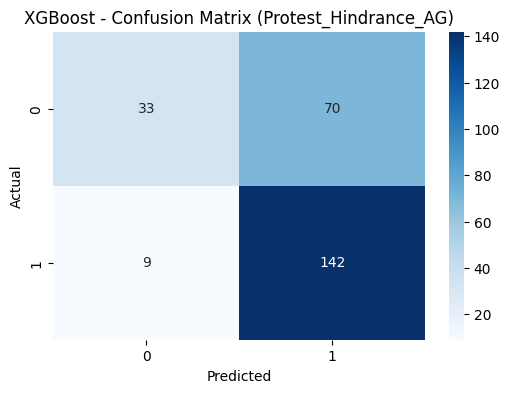

In [62]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost - Confusion Matrix (Protest_Hindrance_AG)")

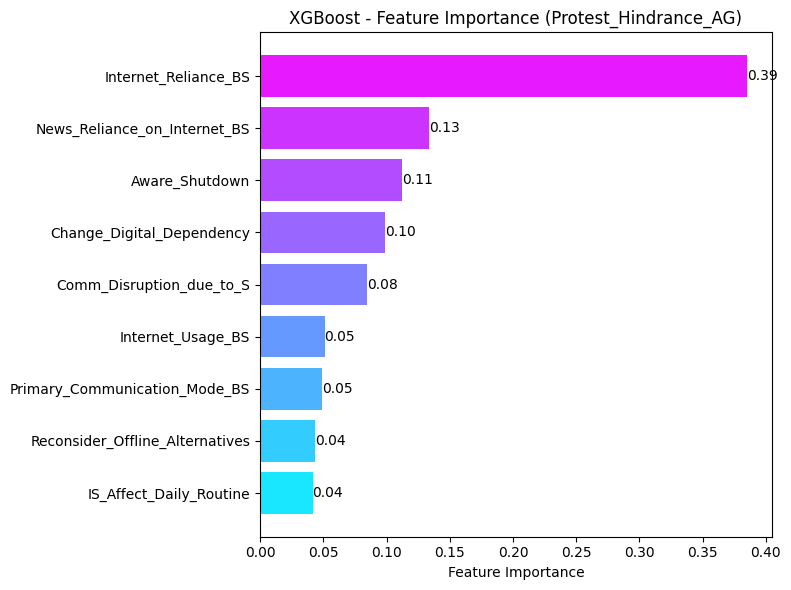


📊XGBoost - Feature Importance (Protest_Hindrance_AG):
                        Feature  Importance
           Internet_Reliance_BS    0.385326
   News_Reliance_on_Internet_BS    0.133369
                 Aware_Shutdown    0.112422
      Change_Digital_Dependency    0.098759
       Comm_Disruption_due_to_S    0.084815
              Internet_Usage_BS    0.050950
  Primary_Communication_Mode_BS    0.049156
Reconsider_Offline_Alternatives    0.043761
        IS_Affect_Daily_Routine    0.041441


In [63]:
# Feature Importance Plot
plot_feature_importance(best_xgb_model.feature_importances_, X.columns, "XGBoost - Feature Importance (Protest_Hindrance_AG)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (Protest_Hindrance_AG):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

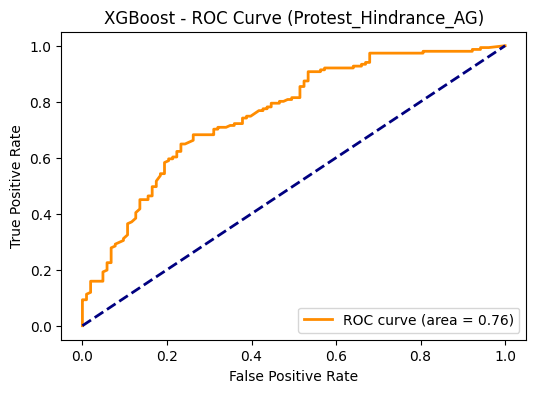

In [64]:

# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_xgb_model, "predict_proba"):
    y_proba_xgb = best_xgb_model.predict_proba(X_test)
    if y_proba_xgb.shape[1] > 2:
        y_score_xgb = y_proba_xgb[:, 1]  # Class 1 probabilities
    else:
        y_score_xgb = y_proba_xgb[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_xgb, "XGBoost - ROC Curve (Protest_Hindrance_AG)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test, y_score_xgb, "XGBoost - Precision-Recall Curve (Protest_Hindrance_AG)")


Step 3.5.11: Splitting Data for Second Target Variable (Future_Civic_Engagement_if_ASO)

In [65]:
# Define features (X2) and new target (y2) for second dependent variable
X2 = df_encoded.drop(columns=['Protest_Hindrance_AG', 'Future_Civic_Engagement_if_ASO', 'ISLAC_Protest_CM'])
y2 = df_encoded['Future_Civic_Engagement_if_ASO']

# Train/Test split (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Show split result
print("✅ Data split completed for Future_Civic_Engagement_if_ASO!")
print("🔹 X_train2 shape:", X_train2.shape)
print("🔹 X_test2 shape:", X_test2.shape)
print("🔹 y_train2 shape:", y_train2.shape)
print("🔹 y_test2 shape:", y_test2.shape)


✅ Data split completed for Future_Civic_Engagement_if_ASO!
🔹 X_train2 shape: (1013, 9)
🔹 X_test2 shape: (254, 9)
🔹 y_train2 shape: (1013,)
🔹 y_test2 shape: (254,)


Step 3.5.12: Random Forest Model Training + Hyperparameter Tuning (Future_Civic_Engagement_if_ASO)

In [66]:
# Define fresh Random Forest model
rf_model2 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rf2 = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid_rf2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf2.fit(X_train2, y_train2)

# Best model
best_rf_model2 = grid_search_rf2.best_estimator_

print("✅ Random Forest tuning complete for Future_Civic_Engagement_if_ASO!")
print("🔹 Best Parameters:", grid_search_rf2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete for Future_Civic_Engagement_if_ASO!
🔹 Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Step 3.5.13: Random Forest Evaluation + All Visualizations (Future_Civic_Engagement_if_ASO)

In [67]:
# Predict
y_pred_rf2 = best_rf_model2.predict(X_test2)

# Test Accuracy
rf_accuracy2 = accuracy_score(y_test2, y_pred_rf2)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy2:.4f}")

# Train Accuracy
y_train_pred_rf2 = best_rf_model2.predict(X_train2)
train_accuracy_rf2 = accuracy_score(y_train2, y_train_pred_rf2)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_rf2))

✅ Random Forest Test Accuracy: 0.6299
✅ Random Forest Train Accuracy: 0.6752

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.29      0.40       107
           1       0.63      0.88      0.73       147

    accuracy                           0.63       254
   macro avg       0.63      0.58      0.57       254
weighted avg       0.63      0.63      0.59       254



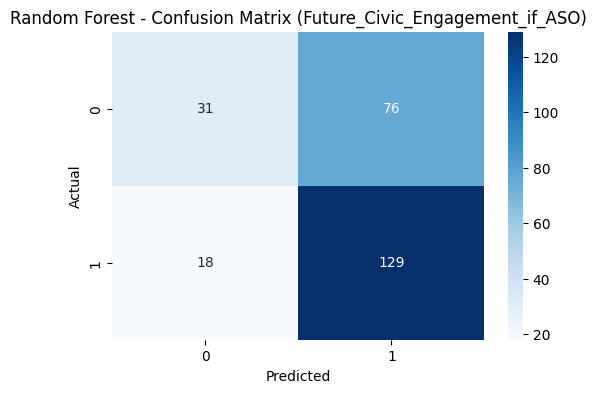

In [68]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_rf2, "Random Forest - Confusion Matrix (Future_Civic_Engagement_if_ASO)")

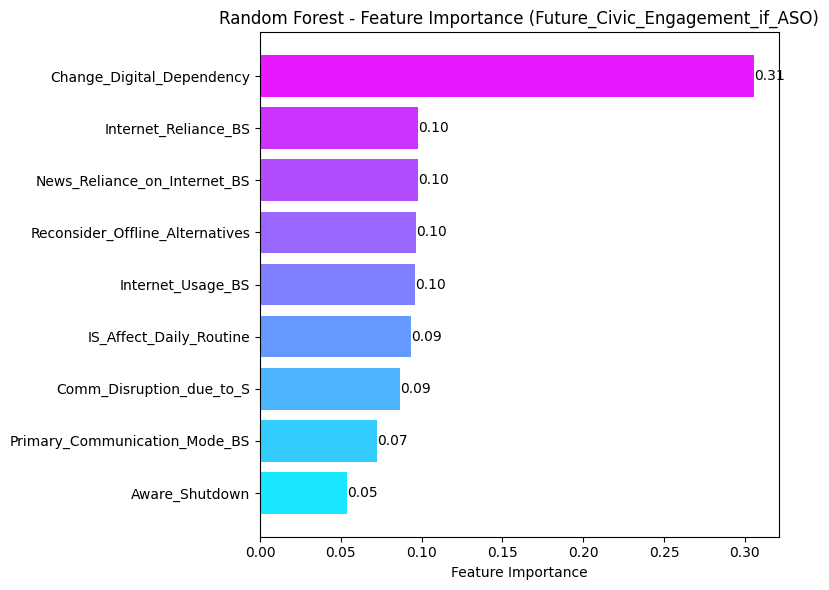


📊Random Forest - Feature Importance (Future_Civic_Engagement_if_ASO):
                        Feature  Importance
      Change_Digital_Dependency    0.305773
           Internet_Reliance_BS    0.097652
   News_Reliance_on_Internet_BS    0.097587
Reconsider_Offline_Alternatives    0.096740
              Internet_Usage_BS    0.095981
        IS_Affect_Daily_Routine    0.093412
       Comm_Disruption_due_to_S    0.086506
  Primary_Communication_Mode_BS    0.072599
                 Aware_Shutdown    0.053748


In [69]:
# Feature Importance
plot_feature_importance(best_rf_model2.feature_importances_, X2.columns, "Random Forest - Feature Importance (Future_Civic_Engagement_if_ASO)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (Future_Civic_Engagement_if_ASO):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

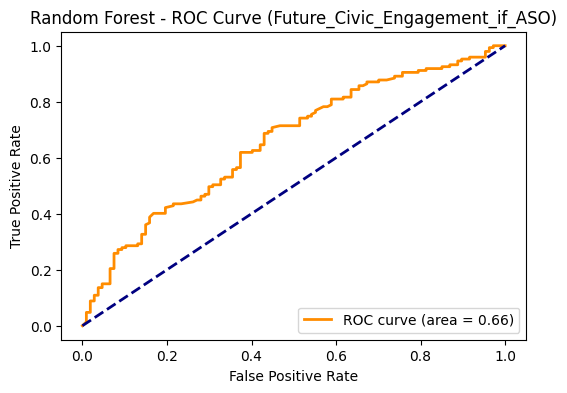

In [70]:
# Probabilities for ROC and PR curves
if hasattr(best_rf_model2, "predict_proba"):
    y_proba_rf2 = best_rf_model2.predict_proba(X_test2)
    if y_proba_rf2.shape[1] > 2:
        y_score_rf2 = y_proba_rf2[:, 1]
    else:
        y_score_rf2 = y_proba_rf2[:, 1]
        
    plot_roc_auc(y_test2, y_score_rf2, "Random Forest - ROC Curve (Future_Civic_Engagement_if_ASO)")
    # plot_precision_recall(y_test2, y_score_rf2, "Random Forest - Precision-Recall Curve (Future_Civic_Engagement_if_ASO)")


Step 3.5.14: XGBoost Model Training + Hyperparameter Tuning (Future_Civic_Engagement_if_ASO)

In [71]:
# Define fresh XGBoost model
xgb_model2 = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define hyperparameter grid
param_grid_xgb2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search_xgb2 = GridSearchCV(
    estimator=xgb_model2,
    param_grid=param_grid_xgb2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb2.fit(X_train2, y_train2)

# Best model
best_xgb_model2 = grid_search_xgb2.best_estimator_

print("✅ XGBoost tuning complete for Future_Civic_Engagement_if_ASO!")
print("🔹 Best Parameters:", grid_search_xgb2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete for Future_Civic_Engagement_if_ASO!
🔹 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


Step 3.5.15: XGBoost Evaluation

In [72]:
# Predict
y_pred_xgb2 = best_xgb_model2.predict(X_test2)

# Test Accuracy
xgb_accuracy2 = accuracy_score(y_test2, y_pred_xgb2)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy2:.4f}")

# Train Accuracy
y_train_pred_xgb2 = best_xgb_model2.predict(X_train2)
train_accuracy_xgb2 = accuracy_score(y_train2, y_train_pred_xgb2)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_xgb2))

✅ XGBoost Test Accuracy: 0.6142
✅ XGBoost Train Accuracy: 0.7127

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.50      0.52       107
           1       0.66      0.70      0.68       147

    accuracy                           0.61       254
   macro avg       0.60      0.60      0.60       254
weighted avg       0.61      0.61      0.61       254



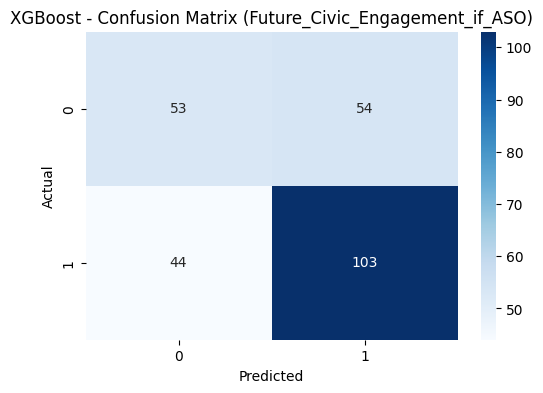

In [73]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_xgb2, "XGBoost - Confusion Matrix (Future_Civic_Engagement_if_ASO)")

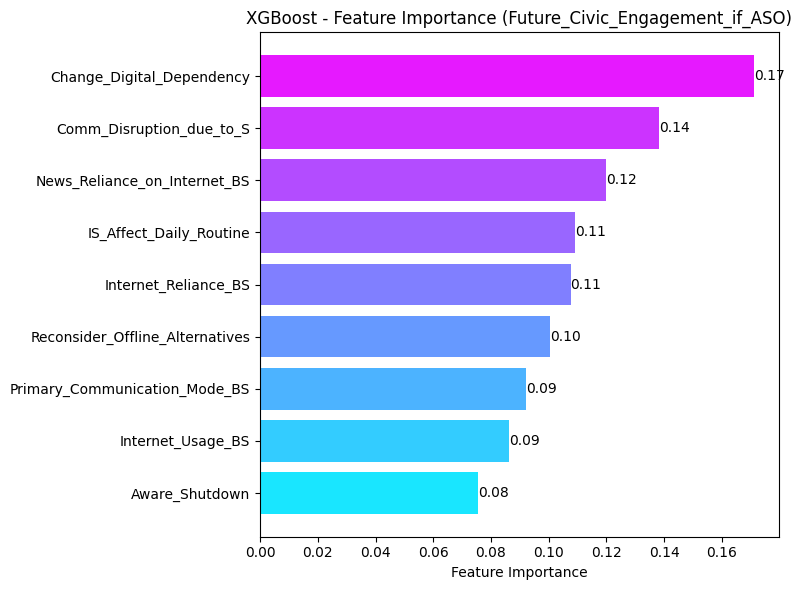


📊XGBoost - Feature Importance (Future_Civic_Engagement_if_ASO):
                        Feature  Importance
      Change_Digital_Dependency    0.171172
       Comm_Disruption_due_to_S    0.138151
   News_Reliance_on_Internet_BS    0.119823
        IS_Affect_Daily_Routine    0.108992
           Internet_Reliance_BS    0.107586
Reconsider_Offline_Alternatives    0.100464
  Primary_Communication_Mode_BS    0.092057
              Internet_Usage_BS    0.086300
                 Aware_Shutdown    0.075454


In [74]:
# Feature Importance
plot_feature_importance(best_xgb_model2.feature_importances_, X2.columns, "XGBoost - Feature Importance (Future_Civic_Engagement_if_ASO)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (Future_Civic_Engagement_if_ASO):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

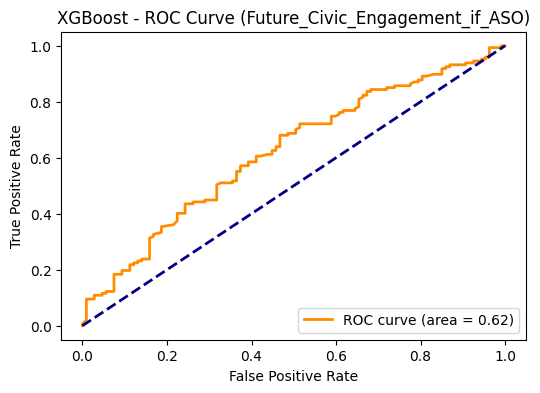

In [75]:
# Probabilities for ROC and PR curves
if hasattr(best_xgb_model2, "predict_proba"):
    y_proba_xgb2 = best_xgb_model2.predict_proba(X_test2)
    if y_proba_xgb2.shape[1] > 2:
        y_score_xgb2 = y_proba_xgb2[:, 1]
    else:
        y_score_xgb2 = y_proba_xgb2[:, 1]
        
    plot_roc_auc(y_test2, y_score_xgb2, "XGBoost - ROC Curve (Future_Civic_Engagement_if_ASO)")
    # plot_precision_recall(y_test2, y_score_xgb2, "XGBoost - Precision-Recall Curve (Future_Civic_Engagement_if_ASO)")


Step 3.5.16: Splitting Data for Third Target Variable (ISLAC_Protest_CM)

In [76]:
# Define features (X3) and new target (y3) for third dependent variable
X3 = df_encoded.drop(columns=['Protest_Hindrance_AG', 'Future_Civic_Engagement_if_ASO', 'ISLAC_Protest_CM'])
y3 = df_encoded['ISLAC_Protest_CM']

# Train/Test split (80% train, 20% test)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.2, random_state=42, stratify=y3
)

# Show split result
print("✅ Data split completed for ISLAC_Protest_CM!")
print("🔹 X_train3 shape:", X_train3.shape)
print("🔹 X_test3 shape:", X_test3.shape)
print("🔹 y_train3 shape:", y_train3.shape)
print("🔹 y_test3 shape:", y_test3.shape)


✅ Data split completed for ISLAC_Protest_CM!
🔹 X_train3 shape: (1013, 9)
🔹 X_test3 shape: (254, 9)
🔹 y_train3 shape: (1013,)
🔹 y_test3 shape: (254,)


Step 3.5.17: Random Forest Model Training + Hyperparameter Tuning (ISLAC_Protest_CM)

In [77]:
# Define fresh Random Forest model for third target
rf_model3 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search_rf3 = GridSearchCV(
    estimator=rf_model3,
    param_grid=param_grid_rf3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf3.fit(X_train3, y_train3)

# Best model from grid search
best_rf_model3 = grid_search_rf3.best_estimator_

print("✅ Random Forest tuning complete for ISLAC_Protest_CM!")
print("🔹 Best Parameters:", grid_search_rf3.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete for ISLAC_Protest_CM!
🔹 Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Step 3.5.18: Random Forest Evaluation + All Visualizations (ISLAC_Protest_CM)

In [78]:
# Predict on test set
y_pred_rf3 = best_rf_model3.predict(X_test3)

# Test Accuracy
rf_accuracy3 = accuracy_score(y_test3, y_pred_rf3)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy3:.4f}")

# Predict on train set
y_train_pred_rf3 = best_rf_model3.predict(X_train3)

# Train Accuracy
train_accuracy_rf3 = accuracy_score(y_train3, y_train_pred_rf3)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf3:.4f}")
# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test3, y_pred_rf3))

✅ Random Forest Test Accuracy: 0.6063
✅ Random Forest Train Accuracy: 0.6328

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.24      0.37        38
           1       0.57      0.78      0.66       116
           2       0.64      0.55      0.59       100

    accuracy                           0.61       254
   macro avg       0.68      0.52      0.54       254
weighted avg       0.64      0.61      0.59       254



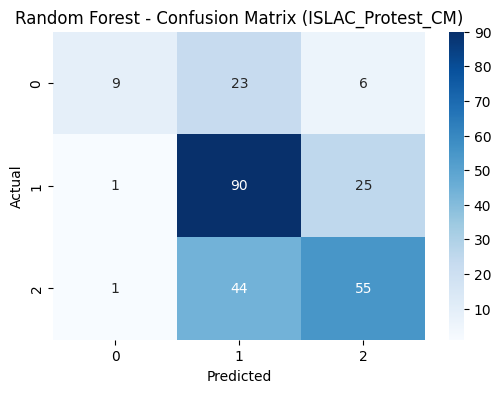

In [79]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test3, y_pred_rf3, "Random Forest - Confusion Matrix (ISLAC_Protest_CM)")

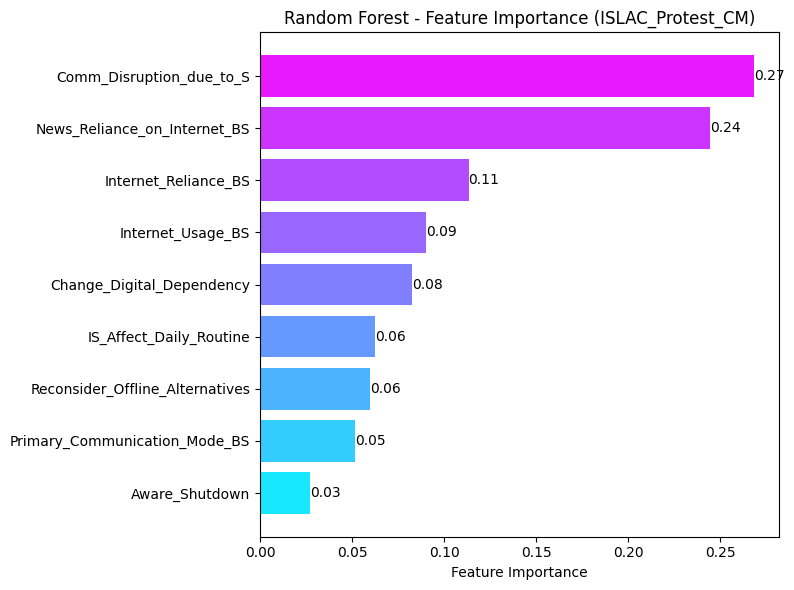


📊Random Forest - Feature Importance (ISLAC_Protest_CM):
                        Feature  Importance
       Comm_Disruption_due_to_S    0.268519
   News_Reliance_on_Internet_BS    0.244383
           Internet_Reliance_BS    0.113324
              Internet_Usage_BS    0.090324
      Change_Digital_Dependency    0.082675
        IS_Affect_Daily_Routine    0.062245
Reconsider_Offline_Alternatives    0.059616
  Primary_Communication_Mode_BS    0.051704
                 Aware_Shutdown    0.027210


In [80]:
# Feature Importance Plot
plot_feature_importance(best_rf_model3.feature_importances_, X3.columns, "Random Forest - Feature Importance (ISLAC_Protest_CM)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (ISLAC_Protest_CM):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

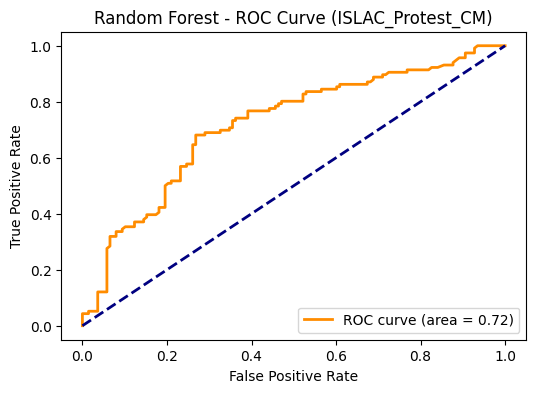

In [81]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_rf_model3, "predict_proba"):
    y_proba_rf3 = best_rf_model3.predict_proba(X_test3)
    if y_proba_rf3.shape[1] > 2:
        y_score_rf3 = y_proba_rf3[:, 1]  # Class 1 probabilities
    else:
        y_score_rf3 = y_proba_rf3[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test3, y_score_rf3, "Random Forest - ROC Curve (ISLAC_Protest_CM)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test3, y_score_rf3, "Random Forest - Precision-Recall Curve (ISLAC_Protest_CM)")

In [82]:

"""
# --- Learning Curve: Training vs Testing Accuracy ---
from sklearn.model_selection import learning_curve

train_sizes3, train_scores3, test_scores3 = learning_curve(
    best_rf_model3, X3, y3, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean3 = np.mean(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes3, train_scores_mean3, 'o-', label='Training Accuracy')
plt.plot(train_sizes3, test_scores_mean3, 'o-', label='Testing Accuracy')
plt.title('Random Forest - Learning Curve (ISLAC_Protest_CM)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
"""


"\n# --- Learning Curve: Training vs Testing Accuracy ---\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes3, train_scores3, test_scores3 = learning_curve(\n    best_rf_model3, X3, y3, cv=5, scoring='accuracy', n_jobs=-1,\n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\ntrain_scores_mean3 = np.mean(train_scores3, axis=1)\ntest_scores_mean3 = np.mean(test_scores3, axis=1)\n\nplt.figure(figsize=(8,6))\nplt.plot(train_sizes3, train_scores_mean3, 'o-', label='Training Accuracy')\nplt.plot(train_sizes3, test_scores_mean3, 'o-', label='Testing Accuracy')\nplt.title('Random Forest - Learning Curve (ISLAC_Protest_CM)')\nplt.xlabel('Training Set Size')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid()\nplt.show()\n"

Step 3.5.19: XGBoost Model Training + Hyperparameter Tuning (ISLAC_Protest_CM)

In [83]:
# Define fresh XGBoost model for third target
xgb_model3 = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train3)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid
param_grid_xgb3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search_xgb3 = GridSearchCV(
    estimator=xgb_model3,
    param_grid=param_grid_xgb3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb3.fit(X_train3, y_train3)

# Best model from grid search
best_xgb_model3 = grid_search_xgb3.best_estimator_

print("✅ XGBoost tuning complete for ISLAC_Protest_CM!")
print("🔹 Best Parameters:", grid_search_xgb3.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete for ISLAC_Protest_CM!
🔹 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Step 3.5.20: XGBoost Model Evaluation + All Visualizations (ISLAC_Protest_CM)

In [84]:
# Predict on test set
y_pred_xgb3 = best_xgb_model3.predict(X_test3)

# Test Accuracy
xgb_accuracy3 = accuracy_score(y_test3, y_pred_xgb3)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy3:.4f}")

# Predict on train set
y_train_pred_xgb3 = best_xgb_model3.predict(X_train3)

# Train Accuracy
train_accuracy_xgb3 = accuracy_score(y_train3, y_train_pred_xgb3)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb3:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test3, y_pred_xgb3))

✅ XGBoost Test Accuracy: 0.6063
✅ XGBoost Train Accuracy: 0.6140

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.24      0.37        38
           1       0.56      0.80      0.66       116
           2       0.67      0.52      0.58       100

    accuracy                           0.61       254
   macro avg       0.68      0.52      0.54       254
weighted avg       0.64      0.61      0.59       254



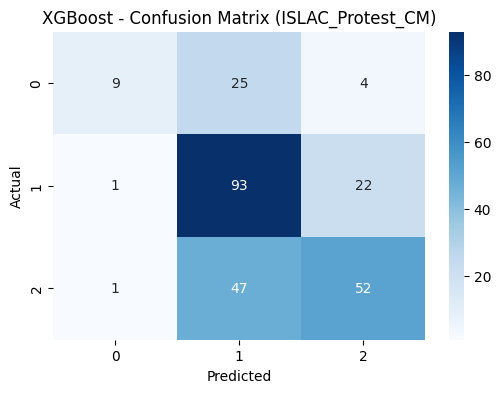

In [85]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test3, y_pred_xgb3, "XGBoost - Confusion Matrix (ISLAC_Protest_CM)")

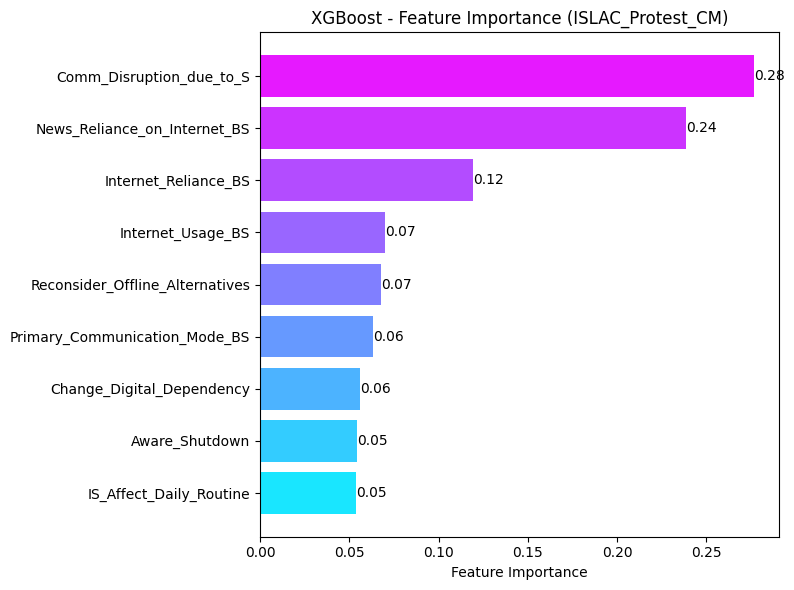


📊XGBoost - Feature Importance (ISLAC_Protest_CM):
                        Feature  Importance
       Comm_Disruption_due_to_S    0.276696
   News_Reliance_on_Internet_BS    0.238676
           Internet_Reliance_BS    0.119322
              Internet_Usage_BS    0.070167
Reconsider_Offline_Alternatives    0.067914
  Primary_Communication_Mode_BS    0.063410
      Change_Digital_Dependency    0.055795
                 Aware_Shutdown    0.054110
        IS_Affect_Daily_Routine    0.053910


In [86]:
# Feature Importance Plot
plot_feature_importance(best_xgb_model3.feature_importances_, X3.columns, "XGBoost - Feature Importance (ISLAC_Protest_CM)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (ISLAC_Protest_CM):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

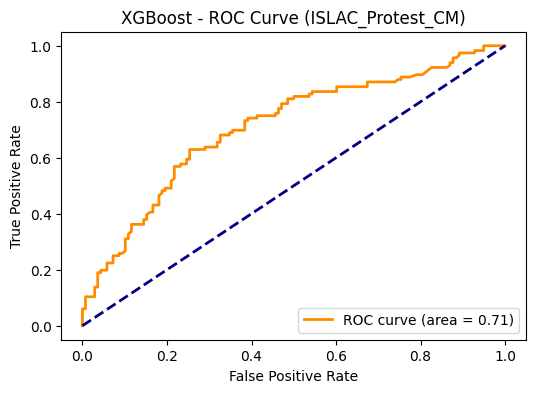

In [87]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_xgb_model3, "predict_proba"):
    y_proba_xgb3 = best_xgb_model3.predict_proba(X_test3)
    if y_proba_xgb3.shape[1] > 2:
        y_score_xgb3 = y_proba_xgb3[:, 1]  # Class 1 probabilities
    else:
        y_score_xgb3 = y_proba_xgb3[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test3, y_score_xgb3, "XGBoost - ROC Curve (ISLAC_Protest_CM)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test3, y_score_xgb3, "XGBoost - Precision-Recall Curve (ISLAC_Protest_CM)")

Step 3.5.21: Summary table of all models

In [88]:
# Define the data manually (put your accuracy numbers here!)
summary_data = {
    'Target Variable': [
        'Protest_Hindrance_AG', 'Protest_Hindrance_AG',
        'Future_Civic_Engagement_if_ASO', 'Future_Civic_Engagement_if_ASO',
        'ISLAC_Protest_CM', 'ISLAC_Protest_CM'
    ],
    'Model': [
        'Random Forest', 'XGBoost',
        'Random Forest', 'XGBoost',
        'Random Forest', 'XGBoost'
    ],
    'Train Accuracy': [
        train_accuracy_rf, train_accuracy_xgb,
        train_accuracy_rf2, train_accuracy_xgb2,
        train_accuracy_rf3, train_accuracy_xgb3
    ],
    'Test Accuracy': [
        rf_accuracy, xgb_accuracy,
        rf_accuracy2, xgb_accuracy2,
        rf_accuracy3, xgb_accuracy3
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display table
print("✅ Model Summary Table:")
display(summary_df)

# Optionally: Save it to Excel if you want
#summary_df.to_excel("Model_Summary_Table.xlsx", index=False)
#print("✅ Saved to Model_Summary_Table.xlsx!")

✅ Model Summary Table:


,Target Variable,Model,Train Accuracy,Test Accuracy
0,Protest_Hindrance_AG,Random Forest,0.715696,0.720472
1,Protest_Hindrance_AG,XGBoost,0.681145,0.688976
2,Future_Civic_Engagement_if_ASO,Random Forest,0.675222,0.629921
3,Future_Civic_Engagement_if_ASO,XGBoost,0.712734,0.614173
4,ISLAC_Protest_CM,Random Forest,0.632774,0.606299
5,ISLAC_Protest_CM,XGBoost,0.614018,0.606299
